# **PROGRAMMING FOR DATA SCIENCE: Final Project**

**Student:** Anna Bicelli <br> 
**ID:** VR509594

# Dataset import and Data cleaning

brief explanation of the dataset, where I found it and waht i analyzes and what it contains
This dataset covers Airbnb activity in New York City and is available at the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata . <br>
<br>
It reports the listing activity of homestays in New York City, their reviews, prices, availability, location, room types and cancellation policies.




**Import libraries:**

In [324]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium

In [325]:
# To see all the columns of the DataFrame
pd.set_option('display.max_columns', None)

In [326]:
# Load CSV file into DataFrame
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


C:\Users\chiar\AppData\Local\Temp\ipykernel_25140\4082681128.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


Since this dataset in column 25 has some mixted types values, I've to check them

In [327]:
airbnb_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307,1006859,1007411,1007964,1008516,1009068
NAME,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,Beautiful 1br on Upper West Side,Central Manhattan/near Broadway,"Lovely Room 1, Garden, Best Area, Legal rental",Wonderful Guest Bedroom in Manhattan for SINGLES
host id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483,1280143094,18824631834,88136055909,26802410424,88920244552
host_identity_verified,unconfirmed,verified,NaN,unconfirmed,verified,verified,NaN,unconfirmed,verified,unconfirmed,verified,verified,verified,verified,verified
host name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl,Miranda,Alan,NaN,Darcy,Leonardo
neighbourhood group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,brookln,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,Upper West Side,Hell's Kitchen,South Slope,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178,40.71344,40.80316,40.76076,40.66829,40.79826
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723,-73.99037,-73.96545,-73.98867,-73.98779,-73.96113
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [328]:
airbnb_df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,US,False,flexible,Entire home/apt,2010.0,"$1,032",$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [329]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [330]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

to check which is the problematic column:

In [331]:
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

I see that the column indixes need to be fixed, I will do that later, now I continue with the search for the problematic values that are contained in the 25th column

In [332]:
column25 = airbnb_df.columns[24]  # the first index is 0 so the 25th column has index 24
print(column25)

house_rules


the problematic columns has name `house_rules`. Now I've to check her values to see what is the problem

In [333]:
print(f"percentage of house_rules NA value: \t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")

percentage of house_rules NA value: 	50.81%


In [334]:
airbnb_df.house_rules.value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

As we can see there's the value **#HOUSE?** that is problematic because is a different type from all other values in this column and it can cause some problems during the analysis so I can **replace** these values with *NaN*:

In [335]:
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [336]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

now I have more null values than before in the `house_rules` column obviuosly:

In [337]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

I want to check that there are no more problematic values in the `house_rules` column

In [338]:
airbnb_df.house_rules.value_counts()

house_rules
House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, we’ll let you know. Check-out is normally 11 am local time, but we’d be happy to extend it as long as we don’t have a cleaning scheduled. Just let us know.  2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID.  4. Our cancellation policy is as shown on our ad and defined by the site you are booking through.  5. Don’t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule.  6. Unfortunately we don’t allow pets in any of our apartments. 7. Unless you’re staying in one of our specialty apartments, we don’t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every 

I don't have problematic values anymore and i can start my analysis.<br>As seen before, column indixes need to be arranged:

In [339]:
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

In [340]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [341]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [342]:
airbnb_df.shape

(102599, 26)

observing the size of the dataset it has 26 columns and 102599 rows, so I can see which variables have an eccessive number of NA values

In [343]:
print(sum(airbnb_df.isna().sum()))
print(airbnb_df.duplicated().sum())

193503
541


# Check null values

to check in which columns I've more null values:

In [344]:
airbnb_df.isnull().sum()

id                                     0
name                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

I remove the dollar sign $ and the commas in the `price` and `service fee` columns and transform them from object to float:

In [345]:
airbnb_df.price = airbnb_df.price.replace({r'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [346]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({r'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.service_fee 


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service_fee, Length: 102599, dtype: float64

In [347]:
airbnb_df.instant_bookable.value_counts()

instant_bookable
False    51474
True     51020
Name: count, dtype: int64

I transform the variabile instant_bookable in boolean:

In [348]:
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].astype(bool)

In [349]:
airbnb_df.instant_bookable.value_counts()

instant_bookable
False    51474
True     51125
Name: count, dtype: int64

In [350]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102599 non-null  bool   
 12  cancellation_pol

The columns of the airbnb dataset are of different types: **object**, **float**, **integer**, so I prefer to divide them in order to see better which columns contain float values, integers and objects

In [351]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

# Null values in columns of boolean type
null_int_columns = airbnb_df.select_dtypes(include=['bool']).isnull().sum()
print("\nNull values in columns of boolean type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
name                         270
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license                   102597
dtype: int64

Null values in columns of integer type:
id         0
host_i

In [352]:
#for float variables
print("Percentage of null values in columns of float type:")
print(f"percentage of lat NA value: \t\t\t\t\t\t{(airbnb_df['lat'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of long NA value: \t\t\t\t\t\t{(airbnb_df['long'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of price NA value:\t\t\t\t\t\t {(airbnb_df['price'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of service_fee NA value:\t\t\t\t\t {(airbnb_df['service_fee'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of construction_year NA value: \t\t\t\t{(airbnb_df['construction_year'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of minimum_nights NA value: \t\t\t\t\t{(airbnb_df['minimum_nights'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of number_of_reviews NA value: \t\t\t\t{(airbnb_df['number_of_reviews'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of reviews_per_month NA value: \t\t\t\t{(airbnb_df['reviews_per_month'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of review_rate_number NA value: \t\t\t\t{(airbnb_df['review_rate_number'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of calculated_host_listings_count NA value: \t\t\t{(airbnb_df['calculated_host_listings_count'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of availability_365 NA value: \t\t\t\t{(airbnb_df['availability_365'].isna().sum()/len(airbnb_df))*100:.2f}%")

Percentage of null values in columns of float type:
percentage of lat NA value: 						0.01%
percentage of long NA value: 						0.01%
percentage of price NA value:						 0.24%
percentage of service_fee NA value:					 0.27%
percentage of construction_year NA value: 				0.21%
percentage of minimum_nights NA value: 					0.40%
percentage of number_of_reviews NA value: 				0.18%
percentage of reviews_per_month NA value: 				15.48%
percentage of review_rate_number NA value: 				0.32%
percentage of calculated_host_listings_count NA value: 			0.31%
percentage of availability_365 NA value: 				0.44%


Based on these information:<br>
- **replace** the null values related to *float* data with their **mean value** because the percentages are really close to zero.<br>
- **remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the dataset.<br>
- **drop** the NaN values in the columns `price` and `service_fee`.

In [353]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'] = airbnb_df['lat'].fillna(lat_mean)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'] = airbnb_df['long'].fillna(long_mean)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'] = airbnb_df['construction_year'].fillna(construction_year_mean)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'] = airbnb_df['minimum_nights'].fillna(minimum_nights_mean)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'] = airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'] = airbnb_df['review_rate_number'].fillna(review_rate_number_mean)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'] = airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'] = airbnb_df['availability_365'].fillna(availability_365_mean)

In [354]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

In [355]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)


In [356]:
#check
airbnb_df.isnull().sum()

id                                     0
name                                 267
host_id                                0
host_identity_verified               284
host_name                            403
neighbourhood_group                   28
neighbourhood                         15
lat                                    0
long                                   0
country                              527
country_code                         122
instant_bookable                       0
cancellation_policy                   71
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
minimum_nights                         0
number_of_reviews                      0
last_review                        15843
review_rate_number                     0
calculated_host_listings_count         0
availability_365                       0
house_rules                        54551
license         

In [357]:
# for object type
print("Percentage of null values in columns of text or object type:")
print(f"\npercentage of name NA value: \t\t\t\t{(airbnb_df['name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_identity_verified NA value:\t\t {(airbnb_df['host_identity_verified'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_name NA value:\t\t\t {(airbnb_df['host_name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood_group NA value:\t\t {(airbnb_df['neighbourhood_group'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood NA value: \t\t\t{(airbnb_df['neighbourhood'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country NA value:\t\t\t\t {(airbnb_df['country'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country_code NA value: \t\t\t{(airbnb_df['country_code'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of cancellation_policy NA value:\t\t{(airbnb_df['cancellation_policy'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of last_review NA value: \t\t\t{(airbnb_df['last_review'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of license NA value: \t\t\t{(airbnb_df['license'].isna().sum() / len(airbnb_df)) * 100:.3f}%")

Percentage of null values in columns of text or object type:

percentage of name NA value: 				0.26%
percentage of host_identity_verified NA value:		 0.28%
percentage of host_name NA value:			 0.39%
percentage of neighbourhood_group NA value:		 0.03%
percentage of neighbourhood NA value: 			0.01%
percentage of country NA value:				 0.52%
percentage of country_code NA value: 			0.12%
percentage of cancellation_policy NA value:		0.07%
percentage of last_review NA value: 			15.52%
percentage of house_rules NA value: 			53.42%
percentage of license NA value: 			99.998%


I decide to:
-  **drop** the columns `last_review`,`license` and `house_rules` because the percentage of null values is excessive and would not lead to useful information
<br>The `house_rules` column is the one in which there were problematic values that I replaced with null values, being null more than half of the values of this variable means that I can delete the column.<br>
- **drop** the NaN values in the columns `host_identity_verified `.<br>
- **replace** the null values related to *object* variables with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot

In [358]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'] = airbnb_df['name'].fillna(name_mode)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'] = airbnb_df['host_name'].fillna(host_name_mode)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'] = airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].fillna(neighbourhood_mode)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'] = airbnb_df['country'].fillna(country_mode)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'] = airbnb_df['country_code'].fillna(country_code_mode)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'] = airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'] = airbnb_df['room_type'].fillna(room_type_mode)

In [359]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [360]:
airbnb_df.dropna(subset=['host_identity_verified'],inplace=True)

In [361]:
airbnb_df.shape

(101829, 22)

I see that the size of the dataframe has reduced after removing the four unwanted columns.<br>
Now I check again for NA values as I did before

In [362]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now that all the null values are settled I can proceed with the understanding of the values in the dataset, finding correlations between them. 

# Analysis of the values and correlations

At this point I want to understand how the data are distributed within the main variables in order to find the most significant variables and some interesting aspects to analyze later.

In [363]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43490
Brooklyn         41528
Queens           13174
Bronx             2691
Staten Island      945
brookln              1
Name: count, dtype: int64

I can see that brookln matches Brooklyn so I want to combine those values and also manhatan matches Manhattan:

In [364]:
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"brookln": "Brooklyn"})
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"manhatan": "Manhattan"})

In [365]:
#check
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43490
Brooklyn         41529
Queens           13174
Bronx             2691
Staten Island      945
Name: count, dtype: int64

In [366]:
airbnb_df.neighbourhood.value_counts()

neighbourhood
Bedford-Stuyvesant        7892
Williamsburg              7718
Harlem                    5418
Bushwick                  4944
Hell's Kitchen            3947
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [367]:
airbnb_df.country.value_counts()

country
United States    101829
Name: count, dtype: int64

Obviously, since this is a dataset regarding airbnbs in New York City, all the solutions are located in the United States.

In [368]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    53309
Private room       46196
Shared room         2210
Hotel room           114
Name: count, dtype: int64

In [369]:
airbnb_df.construction_year.value_counts()

construction_year
2014.000000    5201
2008.000000    5182
2006.000000    5182
2019.000000    5168
2009.000000    5131
2020.000000    5123
2010.000000    5122
2022.000000    5104
2005.000000    5094
2012.000000    5091
2003.000000    5079
2007.000000    5077
2015.000000    5061
2011.000000    5030
2017.000000    5022
2018.000000    5012
2021.000000    5003
2004.000000    4994
2013.000000    4985
2016.000000    4981
2012.487464     187
Name: count, dtype: int64

In [370]:
airbnb_df.construction_year.dtype

dtype('float64')

In the `construction_year` column there is the value 
2012.487464, but since it's a year, I don't want it to be float and I turn the column into **integer**

In [371]:
airbnb_df.construction_year = airbnb_df.construction_year.astype(int)

In [372]:
#check
airbnb_df.construction_year.value_counts()

construction_year
2012    5278
2014    5201
2006    5182
2008    5182
2019    5168
2009    5131
2020    5123
2010    5122
2022    5104
2005    5094
2003    5079
2007    5077
2015    5061
2011    5030
2017    5022
2018    5012
2021    5003
2004    4994
2013    4985
2016    4981
Name: count, dtype: int64

In [373]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
 1.0      25246
 2.0      23436
 3.0      16005
 30.0     11552
 4.0       6590
          ...  
 81.0         1
 160.0        1
-1.0          1
 175.0        1
 825.0        1
Name: count, Length: 150, dtype: int64

I see that in the `minimum night` column there are negative values, but it is not possible that the minimum number of nights you have to stay in an Airbnb is negative, so there is inconsistency in the data. <br>
 I decide to **replace** the negative cells with 1, because a guest stays at least one night in the Aribnb

In [374]:
airbnb_df[airbnb_df['minimum_nights']<0].head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,US,False,flexible,Private room,2008,1155.0,231.0,-10.0,213.0,5.0,2.0,19.0
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,United States,US,True,moderate,Entire home/apt,2009,73.0,15.0,-5.0,104.0,5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,US,False,flexible,Private room,2015,779.0,156.0,-1.0,82.0,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,US,False,flexible,Entire home/apt,2008,874.0,175.0,-10.0,68.0,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,US,False,moderate,Entire home/apt,2021,920.0,184.0,-12.0,203.0,5.0,3.0,77.0


In [375]:
#  select the rows with negative 'minimum_nights' and assign them the value 1
airbnb_df.loc[airbnb_df['minimum_nights'] < 0, 'minimum_nights'] = 1

In [376]:
# check
airbnb_df.minimum_nights.value_counts()

minimum_nights
1.0      25259
2.0      23436
3.0      16005
30.0     11552
4.0       6590
         ...  
250.0        1
340.0        1
184.0        1
153.0        1
825.0        1
Name: count, Length: 140, dtype: int64

In [377]:
# another check
airbnb_df[airbnb_df['minimum_nights']<0]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365


In [378]:
airbnb_df.number_of_reviews.value_counts()

number_of_reviews
0.0      15647
1.0      10315
2.0       7120
3.0       5339
4.0       4122
         ...  
406.0        1
483.0        1
367.0        1
648.0        1
300.0        1
Name: count, Length: 476, dtype: int64

In [379]:
airbnb_df.review_rate_number.value_counts()

review_rate_number
5.000000    23197
4.000000    23147
3.000000    23113
2.000000    22929
1.000000     9131
3.279106      312
Name: count, dtype: int64

In [380]:
airbnb_df.cancellation_policy.value_counts()

cancellation_policy
moderate    34160
strict      33866
flexible    33803
Name: count, dtype: int64

In [381]:
airbnb_df.host_name.value_counts()

host_name
Michael            1275
David               759
John                574
Alex                545
Sonder (NYC)        513
                   ... 
Anshu                 1
Hayet                 1
Steven And John       1
Maneto                1
LaQuann               1
Name: count, Length: 13142, dtype: int64

In [382]:
airbnb_df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1.0     62966
2.0     14345
3.0      6523
4.0      3533
5.0      1978
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 79, dtype: int64

In [383]:
airbnb_df.availability_365.value_counts()

availability_365
 0.0       23361
 365.0      2492
 364.0      1159
 89.0        749
 1.0         729
           ...  
 417.0        32
-6.0          32
 391.0        30
 401.0        29
 3677.0        1
Name: count, Length: 439, dtype: int64

In [384]:
airbnb_df.host_identity_verified.value_counts()

host_identity_verified
unconfirmed    50970
verified       50859
Name: count, dtype: int64

Which is the percentage of hosts who have confirmed their identity?

In [385]:
verified_counts = airbnb_df['host_identity_verified'].value_counts()['verified']

percent_verified = (verified_counts / len(airbnb_df)) * 100

print(f"The percentage of hosts who verified their identity is: {percent_verified:.2f}%")

The percentage of hosts who verified their identity is: 49.95%


In [386]:
airbnb_df.name.value_counts()

name
Home away from home                               287
Hillside Hotel                                     30
Water View King Bed Hotel Room                     28
New york Multi-unit building                       27
Brooklyn Apartment                                 27
                                                 ... 
One stop subway from mamhattan                      1
Luxurious Ensuite in Historic Brownstone            1
Charming Apt in Historic Greenpoint Brownstone      1
Huge Room Right by the Myrtle JMZ                   1
Parisian Style Apartment in Heart of Brooklyn       1
Name: count, Length: 60858, dtype: int64

Now I want to check the correlations between the variables of this dataframe

In [387]:
airbnb_df_corr = airbnb_df.corr(numeric_only=True)
airbnb_df_corr

,id,host_id,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
id,1.000000,-0.000257,-0.008746,0.042240,0.004265,0.001037,0.007265,0.007265,0.006030,-0.039138,0.036227,0.023585,-0.138310
host_id,-0.000257,1.000000,0.000882,-0.008739,0.003500,0.005001,0.003231,0.003212,-0.001894,-0.004771,0.003216,0.001882,-0.002305
lat,-0.008746,0.000882,1.000000,0.073473,0.000576,0.005756,-0.005756,-0.005733,0.015877,-0.025357,-0.003528,0.032578,-0.004872
long,0.042240,-0.008739,0.073473,1.000000,-0.004668,0.000801,0.003208,0.003202,-0.039253,0.070140,0.015158,-0.104788,0.058740
instant_bookable,0.004265,0.003500,0.000576,-0.004668,1.000000,0.002297,0.000384,0.000384,-0.002675,0.001799,0.002805,-0.000471,-0.003851
construction_year,0.001037,0.005001,0.005756,0.000801,0.002297,1.000000,-0.003725,-0.003703,-0.000565,0.002368,0.005141,-0.002677,-0.008886
price,0.007265,0.003231,-0.005756,0.003208,0.000384,-0.003725,1.000000,0.999991,-0.002920,0.004991,-0.004375,-0.000332,-0.002998
service_fee,0.007265,0.003212,-0.005733,0.003202,0.000384,-0.003703,0.999991,1.000000,-0.002905,0.004968,-0.004377,-0.000325,-0.002990
minimum_nights,0.006030,-0.001894,0.015877,-0.039253,-0.002675,-0.000565,-0.002920,-0.002905,1.000000,-0.051305,-0.002961,0.085204,0.060379
number_of_reviews,-0.039138,-0.004771,-0.025357,0.070140,0.001799,0.002368,0.004991,0.004968,-0.051305,1.000000,-0.017598,-0.080657,0.098305


<function matplotlib.pyplot.show(close=None, block=None)>

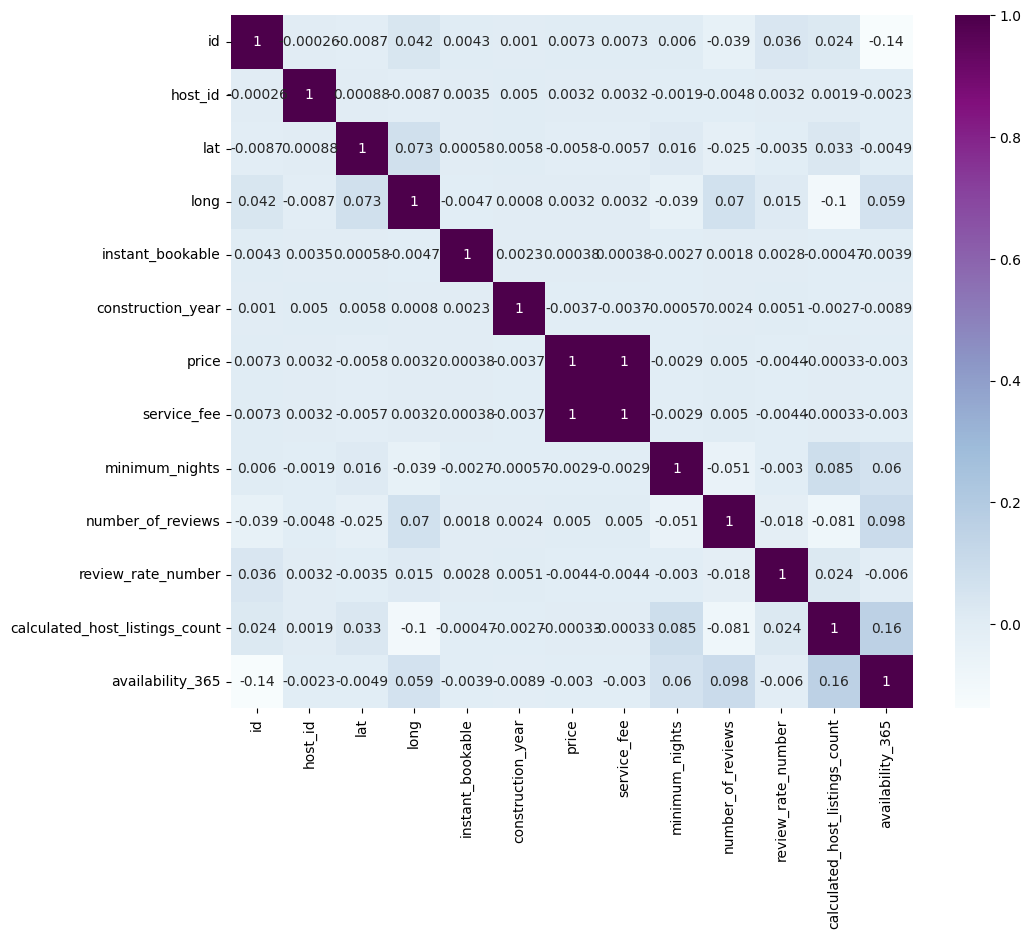

In [388]:
plt.figure(figsize=(11,9))
sns.heatmap(airbnb_df_corr, annot=True, cmap="BuPu")
plt.show

I see that all numerical variables are uncorrelated with each other, except `price` and `service_fee` which are perfectly positively correlated.

In [389]:
#sns.pairplot(airbnb_df)

A first graphical analysis was carried out using scatterplots as a graphical method, so as to observe how the main variables relate to each other.

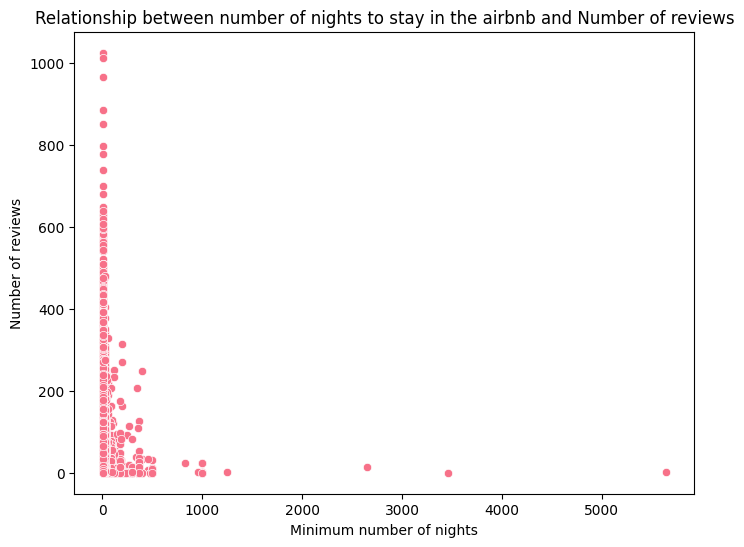

In [390]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='minimum_nights', y='number_of_reviews')
plt.xlabel('Minimum number of nights')
plt.ylabel('Number of reviews')
plt.title('Relationship between number of nights to stay in the airbnb and Number of reviews')
plt.show()

the minimum number of nights is low, in fact most are around in the range of 1 night to 1 month and I notice that as the minimum number of nights increases, the number of reviews drops. It could be due to the fact that only a few guests stayed for a long time, and perhaps not all of them left a review at the end of their stay. On the other hand, I see that for Airbnbs with a low minimum number of nights there are quite a few reviews, even more than 1000 and I want to investigate these values better:

In [391]:
min_night_rew=airbnb_df.groupby('minimum_nights')['number_of_reviews'].max()
min_night_rew

minimum_nights
1.0       1010.0
2.0       1024.0
3.0        483.0
4.0        389.0
5.0        451.0
           ...  
1000.0       0.0
1250.0       2.0
2645.0      14.0
3455.0       0.0
5645.0       1.0
Name: number_of_reviews, Length: 140, dtype: float64

Most of the reviews in this listing are for accommodations with 1 night minimum stay.

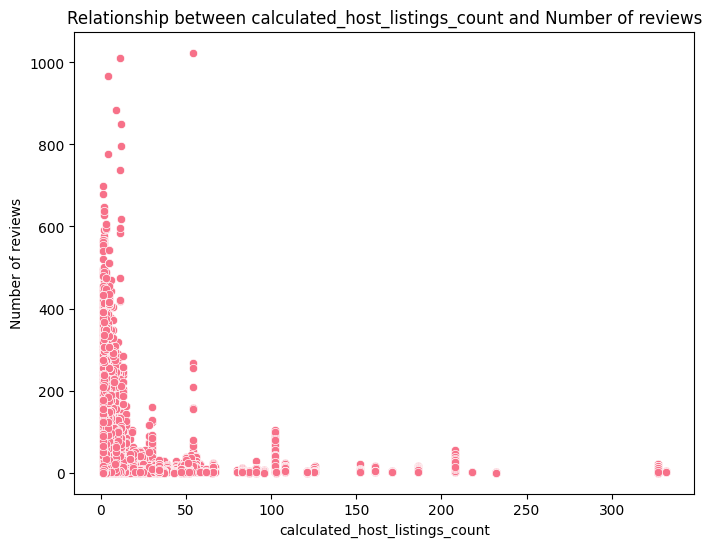

In [392]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='calculated_host_listings_count', y='number_of_reviews')
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Number of reviews')
plt.title('Relationship between calculated_host_listings_count and Number of reviews')
plt.show()

In [393]:
host_rew=airbnb_df.groupby('calculated_host_listings_count')['number_of_reviews'].max()
host_rew

calculated_host_listings_count
1.0      698.0
2.0      648.0
3.0      607.0
4.0      966.0
5.0      543.0
         ...  
208.0     54.0
218.0      2.0
232.0      2.0
327.0     20.0
332.0      3.0
Name: number_of_reviews, Length: 79, dtype: float64

most hosts have few airbnbs with few reviews, there are some exceptions who have many reviews for the few apartments and then there are those who have more than 300 apartments who have very few reviews.

Now I want to analyze the impact of the service fee on the daily room price:

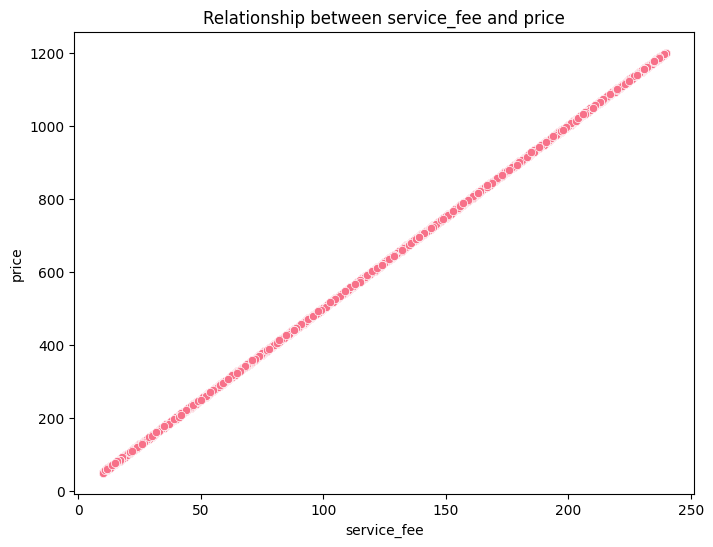

In [394]:
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='service_fee', y='price')
plt.xlabel('service_fee')
plt.ylabel('price')
plt.title('Relationship between service_fee and price')
plt.show()

they're perfectly correlated so if the price of the airbnb increases, also the service_fee increases.<br>I look at relationship between price and numer of reviews:

<Figure size 600x400 with 0 Axes>

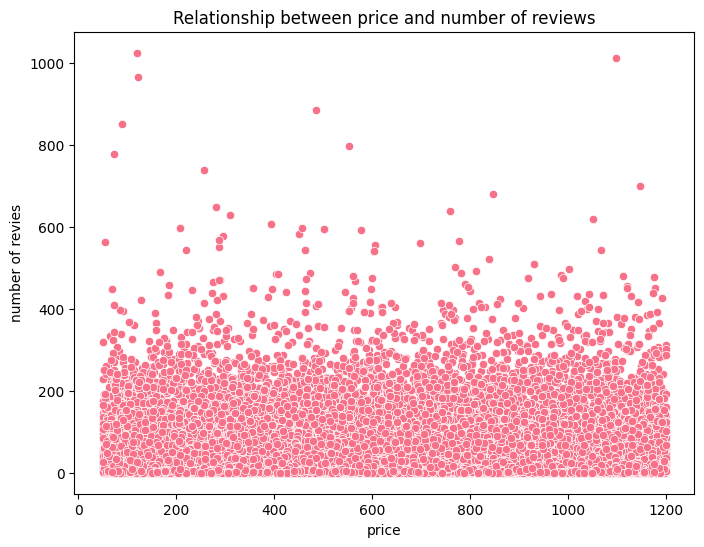

In [395]:
plt.figure(figsize=(6,4))
plt.figure(figsize=(8, 6))
sns.set_palette("husl")
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews')
plt.xlabel('price')
plt.ylabel('number of revies')
plt.title('Relationship between price and number of reviews')
plt.show()

I see that the daily prices of the airbnbs are not affected by the number of reviews they have, in fact in this scatterplot I do not observe any particular trend, also I know that the relationship coefficient between 'price' and 'numer_of_reviews' is 0.0052 which indicates that they are uncorrelated.<br> Now I want to do a scatterplot between these two variables to explore their relationship with the type of room:

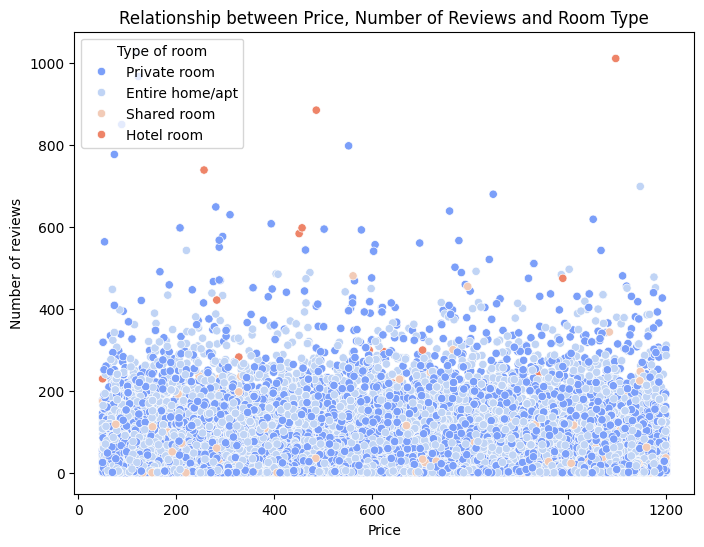

In [396]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews', hue='room_type', palette='coolwarm')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Relationship between Price, Number of Reviews and Room Type')
plt.legend(title='Type of room', bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

I notice that for all room types the price is not affected by the number of reviews and I wanto to see the same relationship with service_fee:

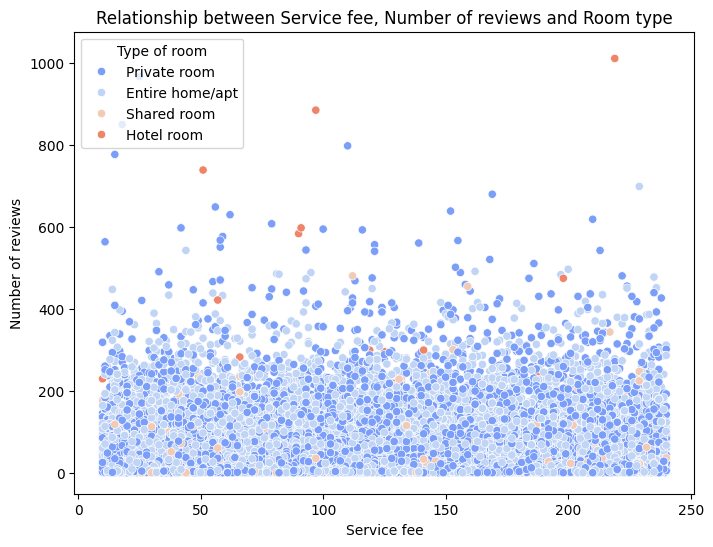

In [397]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_df, x='service_fee', y='number_of_reviews', hue='room_type', palette='coolwarm')
plt.xlabel('Service fee')
plt.ylabel('Number of reviews')
plt.title('Relationship between Service fee, Number of reviews and Room type')
plt.legend(title='Type of room', bbox_to_anchor=(0, 1), loc='upper left')
plt.show()

From this scatterplot, it can be observed that service_fee also doesn't vary by room type

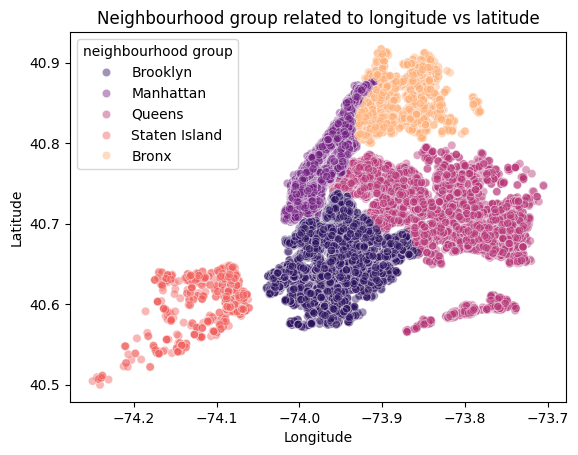

In [398]:
sns.scatterplot(x='long', y='lat', hue='neighbourhood_group',palette='magma', data=airbnb_df, alpha=0.45)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood group related to longitude vs latitude')
plt.legend(title='neighbourhood group')
plt.show()

In this scatterplot I see that there are clear differences in the distribution of the neighbourhood_group. It shows that some neighbourhood groups have a higher concentration of Airbnb, such as Manhattan and Brooklyn, than others with lower concentration, because they are affected by more parks, green areas and fewer attractions, such as in Staten Island. I can observe that while being the smallest borough in term of area, Manhattan is densely populated with Airbnb accommodation.

Observe whether there is a clear relationship between the location of the Airbnbs and their prices:

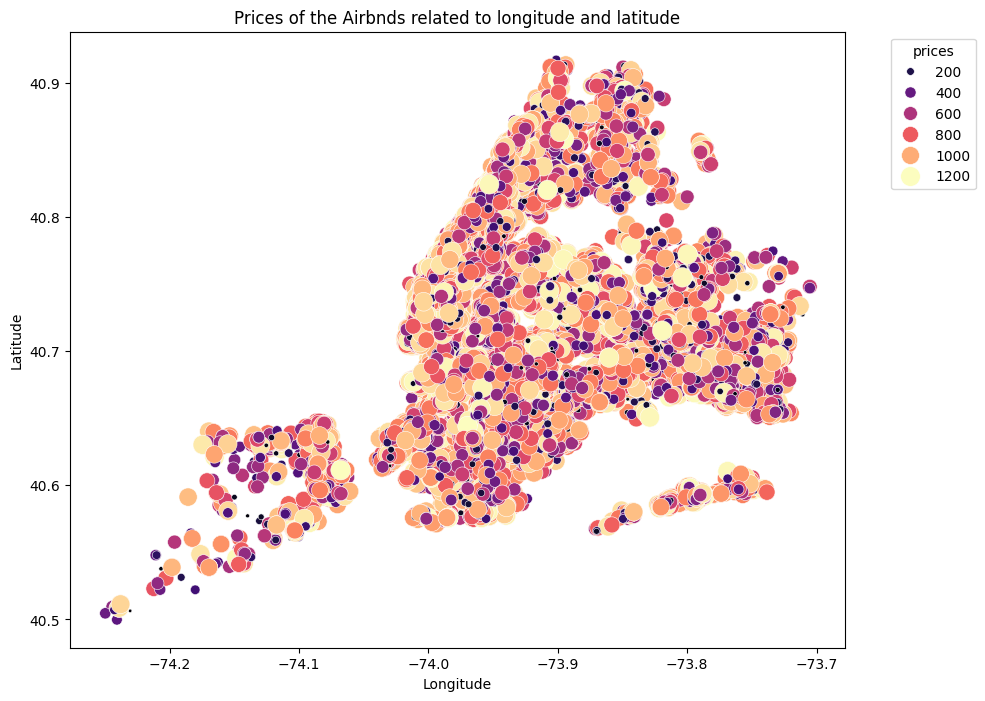

In [399]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price',  size='price', sizes=(5, 200), data=airbnb_df, palette='magma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prices of the Airbnds related to longitude and latitude')
plt.legend(title='prices', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I see that the daily prices of airbnbs are evenly distributed over the various neighboorhood_groups.<br>
Points corresponding to more expensive accommodations are represented by larger points

Now I try to study the correlation between two categorical variables: `room_type` and `cancellation_policy` using contingency table heatmap

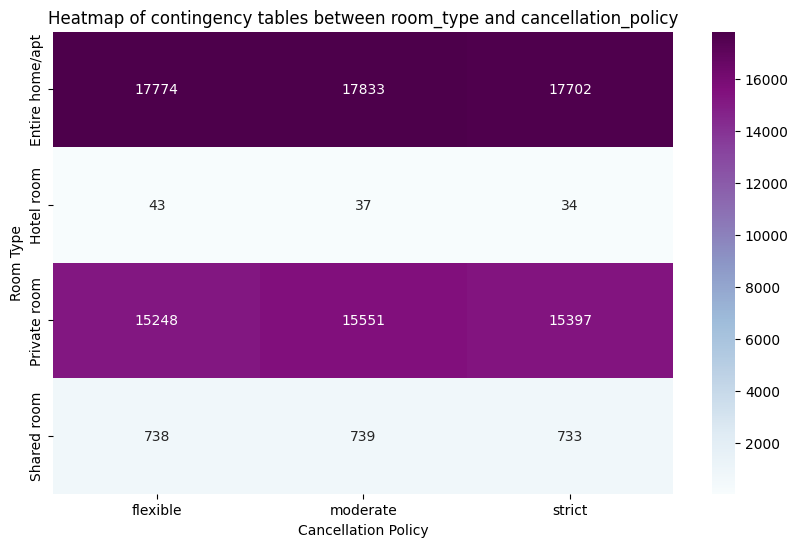

In [400]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['room_type'], airbnb_df['cancellation_policy'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of contingency tables between room_type and cancellation_policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Room Type')
plt.show()


From the information provided by the heatmap, I can infer that:<br>
- for "entire apt" reservations, more cancellations are available with flexible and moderate policies than strict policies<br>
- for "hotel room" type reservations, cancellations are relatively low and similar among different cancellation policies<br>
- for private room type reservations, cancellations are similar between flexible, moderate and strict policies<br>
- for shared room reservations, cancellations are similar among the different cancellation policies, with a slight difference between flexible and moderate versus strict policies.

Now I study the relationship between two other categorical variables:`neighborhood_group` and `room:type` in order to see if there are neighborhoods in which the Airbnbs offered are principally in one category:

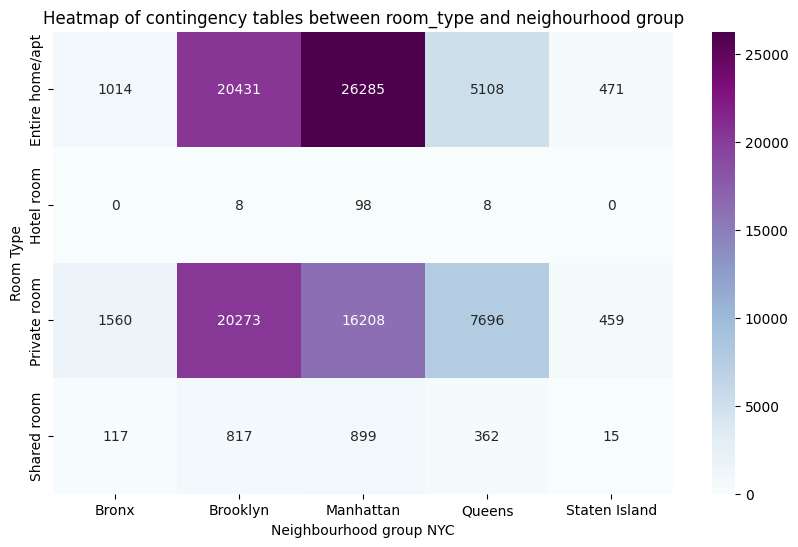

In [401]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['room_type'], airbnb_df['neighbourhood_group'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of contingency tables between room_type and neighourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('Room Type')
plt.show()

From this heatmap I can draw some conclusions:<br>
° It can be seen that the types of apartments offered on Airbnb are differentially distributed in different neighborhoods of New York City. For example, Manhattan seems to have a higher concentration of whole houses and private rooms than other types.<br>
° It's possible to see which type of apartment is more common in each neighborhood. For example, in Manhattan there might be a greater presence of whole houses than other types, while in Staten Island private rooms might be more common.


I study other categorical varibles: between `neighbourhodds_group` and `neighbourhood`:

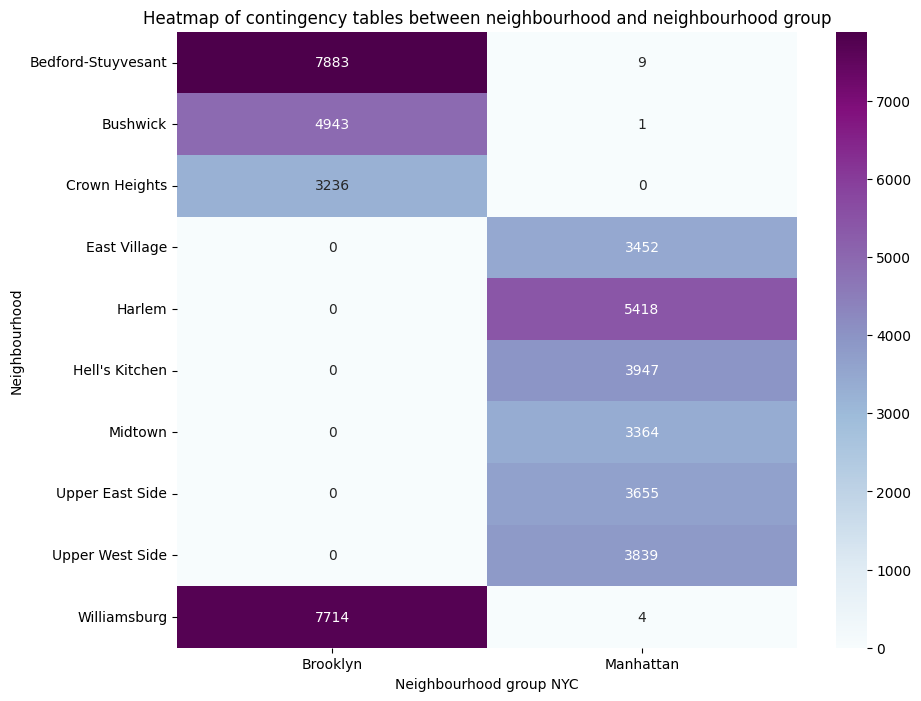

In [402]:
# Calculate the 10 neighbourhoods with the most airbnbs
neighbourhood_by_most_Airbnbs = airbnb_df['neighbourhood'].value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10).index

# I use isin to include only the rows corresponding to the top 10 neighbourhoods
airbnb_df_top_10_neighbourhood = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighbourhood)]

# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df_top_10_neighbourhood['neighbourhood'], airbnb_df_top_10_neighbourhood['neighbourhood_group'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of contingency tables between neighbourhood and neighbourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('Neighbourhood')
plt.show()

this heatmap shows only the columns for 'Brooklyn' and 'Manhattan' because the selected top 10 neighborhoods belong only to these two neighborhood_groups. If the top 10 neighborhoods were distributed across all five neighborhood_groups, then the heatmap would also show the columns corresponding to the other neighborhood_groups such as 'Queens', 'Bronx' and 'Staten Island'.

Now I want to see which `neighbourhood_groups` have the most hosts verifying their identity


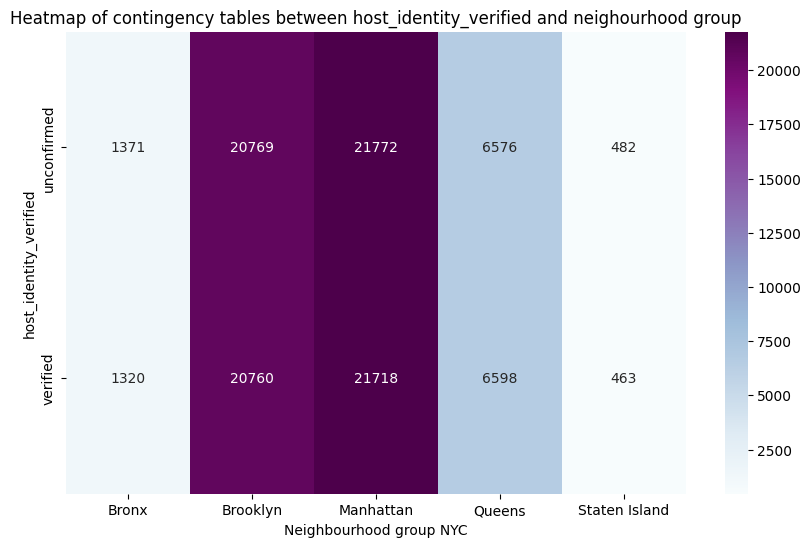

In [403]:
# Calculate the contingency table
contingency_table = pd.crosstab(airbnb_df['host_identity_verified'], airbnb_df['neighbourhood_group'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='d')
plt.title('Heatmap of contingency tables between host_identity_verified and neighourhood group')
plt.xlabel('Neighbourhood group NYC')
plt.ylabel('host_identity_verified')
plt.show()

From this heatmap I can draw some conclusions:<br>
it's possibile to clearly see that Manhattan and Brooklyn are the neighborhood groups in which the highest number of Airbnb hosts are found, both for verified and unverified hosts. This might indicate a higher popularity of these areas for hosting on Airbnb than the other neighborhood groups.
<br>The Bronx, Queens, and Staten Island neighborhoods have the fewest airbnbs, as seen above.
<br>
It might be interesting to further examine how identity verification affects guest reviews.

# EDA

Number of Airbnb in the different neighbourhood groups

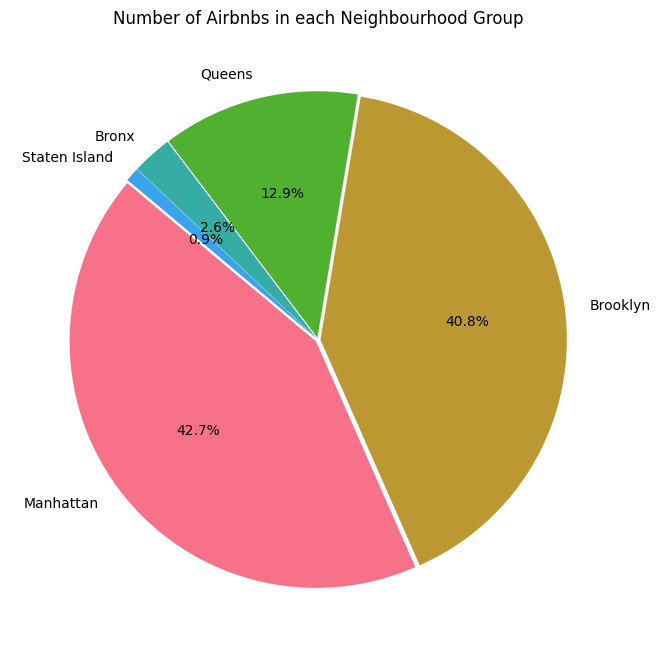

In [404]:
neighbourhood_group_counts = airbnb_df['neighbourhood_group'].value_counts()
explode=(0.01,0.01,0.01,0.01,0.01)

# Create the pie graph
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_counts, explode=explode, labels=neighbourhood_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Airbnbs in each Neighbourhood Group')
plt.show()

I want to know which are the top 20 Airbnbs' names

In [405]:
name_for_most_Airbnbs = airbnb_df.name.value_counts()
top_20_names = name_for_most_Airbnbs.head(20)
top_20_names

name
Home away from home                                   287
Hillside Hotel                                         30
Water View King Bed Hotel Room                         28
New york Multi-unit building                           27
Brooklyn Apartment                                     27
Private Room                                           23
Private room in Brooklyn                               19
Beautiful 2 Double Bed Hotel Room                      18
Cozy home away from home                               18
IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     18
Beautiful King Bed Hotel Room                          18
Cozy Brooklyn Apartment                                18
Private room                                           17
Harlem Gem                                             16
Hotel Room King Bed Chelsea                            16
Private room in Williamsburg                           16
Loft Suite                                             15
20-25 min

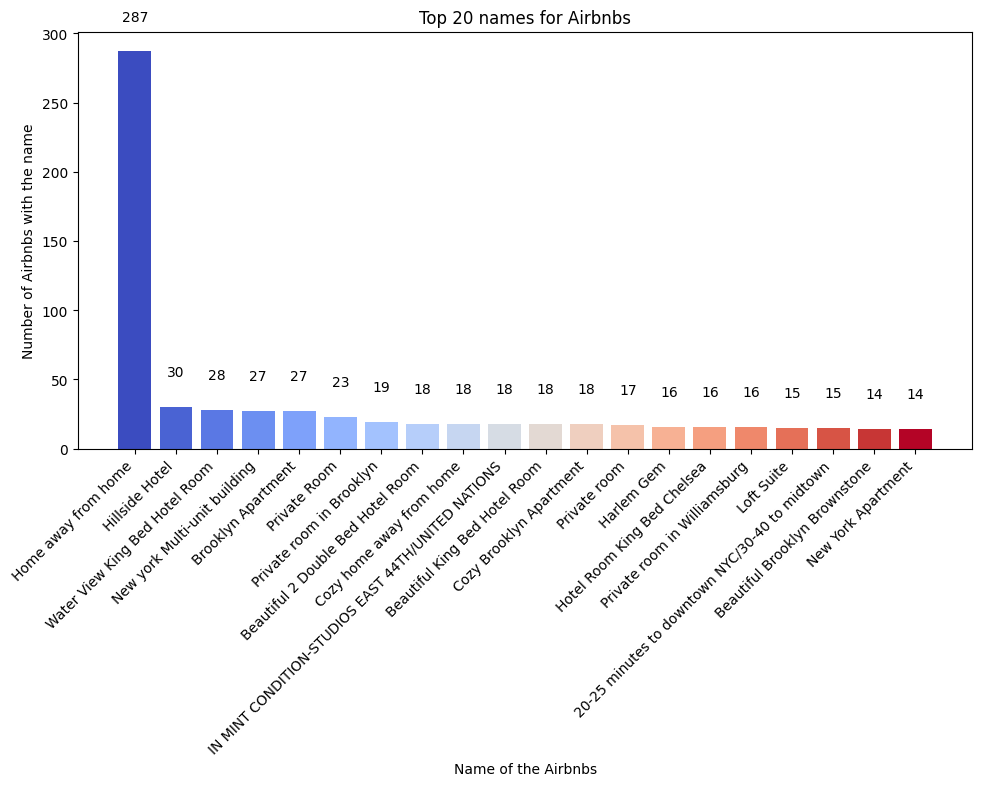

In [406]:
plt.figure(figsize=(10,8))
x = top_20_names.index 
y = top_20_names # Number of neighbourhoods
plt.title('Top 20 names for Airbnbs')
bars = plt.bar(x, y, color=plt.cm.coolwarm(np.linspace(0, 1, len(x))))
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of Airbnbs with the name')
plt.xlabel('Name of the Airbnbs')
for bar, v in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


the most popular airbnb name in New York is **Home away from home**

and the top 20 host's names are:

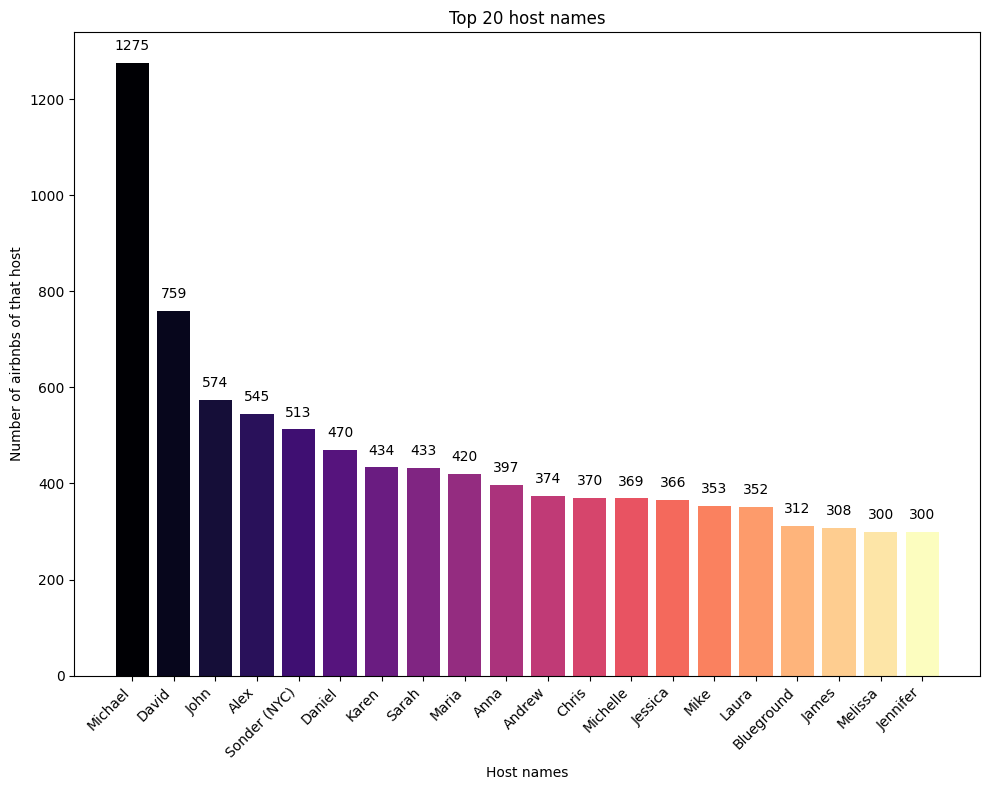

In [407]:
host_name = airbnb_df.host_name.value_counts()
top_20__host_names = host_name.head(20)

plt.figure(figsize=(10,8))
x = top_20__host_names.index 
y = top_20__host_names # Number of neighbourhoods
plt.title('Top 20 host names')
bars = plt.bar(x, y, color=plt.cm.magma(np.linspace(0, 1, len(x)))) 
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of airbnbs of that host')
plt.xlabel('Host names')
for bar, v in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

The name of the host with the most Airbnb in New York is **Michael**.

10 neighbouroods with most airbnbs:

In [408]:
neighbourhood_by_most_Airbnbs = airbnb_df.neighbourhood.value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10)
top_10_neighbourhood

neighbourhood
Bedford-Stuyvesant    7892
Williamsburg          7718
Harlem                5418
Bushwick              4944
Hell's Kitchen        3947
Upper West Side       3839
Upper East Side       3655
East Village          3452
Midtown               3364
Crown Heights         3236
Name: count, dtype: int64

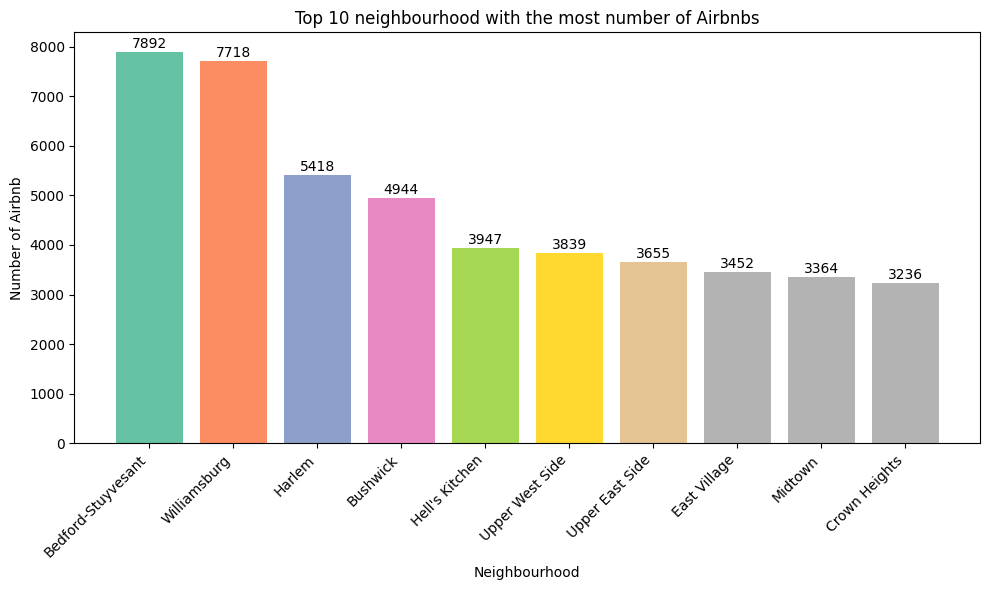

In [409]:
palette = 'Set2'

plt.figure(figsize=(10,6))
x = top_10_neighbourhood.index 
y = top_10_neighbourhood # Number of neighbourhoods
plt.title('Top 10 neighbourhood with the most number of Airbnbs')
plt.bar(x, y, color=plt.get_cmap(palette)(range(len(x))))
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of Airbnb')
plt.xlabel('Neighbourhood')
for i, v in enumerate(y):#i index of y, v is the number of airbnbs in the neighbourhood of index i
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


in the **Bedford-Stuyvesant** neighborhood is where most of the Airbnbs in New York City are located, and I want to know what neighbourhood group it belongs to:

In [411]:
# Seleziona i quartieri con il maggior numero di Airbnb
top_10_neighbourhoods = airbnb_df['neighbourhood'].value_counts().head(10).index.tolist()

# Filtra il DataFrame originale per includere solo i quartieri nella lista dei top 10
top_neighbourhoods_df = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighbourhoods)]

# Visualizza i neighbourhood_group corrispondenti ai quartieri selezionati
neighbourhood_group_for_top = top_neighbourhoods_df.groupby('neighbourhood')['neighbourhood_group'].first()
print(neighbourhood_group_for_top)


neighbourhood
Bedford-Stuyvesant     Brooklyn
Bushwick               Brooklyn
Crown Heights          Brooklyn
East Village          Manhattan
Harlem                Manhattan
Hell's Kitchen        Manhattan
Midtown               Manhattan
Upper East Side       Manhattan
Upper West Side       Manhattan
Williamsburg           Brooklyn
Name: neighbourhood_group, dtype: object


the Bedford-Stuyvesant neighborhood  belongs to **Brooklyn**

Now I want to know the year where the most Airbnbs were built:

In [412]:
years=airbnb_df.construction_year.value_counts()
years

construction_year
2012    5278
2014    5201
2006    5182
2008    5182
2019    5168
2009    5131
2020    5123
2010    5122
2022    5104
2005    5094
2003    5079
2007    5077
2015    5061
2011    5030
2017    5022
2018    5012
2021    5003
2004    4994
2013    4985
2016    4981
Name: count, dtype: int64

Construction years range from 2003 to 2022, and the largest number of airbnbs were built in 2012, as it can also be seen in:

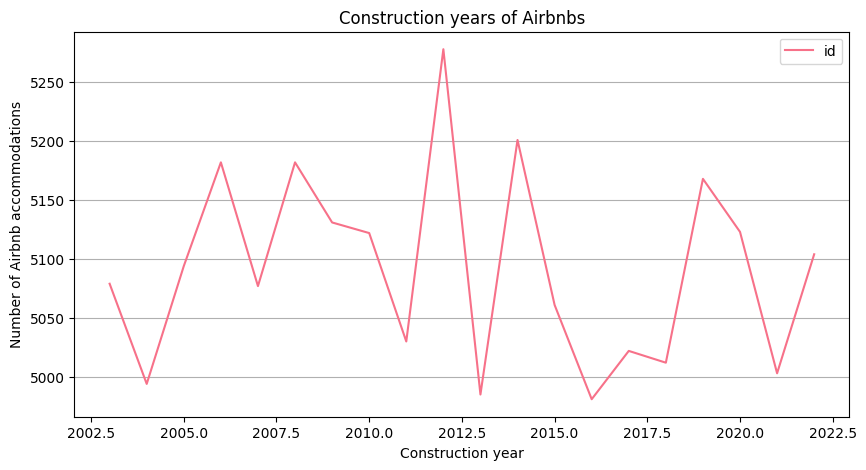

In [483]:
plt.figure(figsize=(10, 5))
airbnb_df.groupby('construction_year')['id'].count().plot(kind='line')
plt.title('Construction years of Airbnbs')
plt.xlabel('Construction year')
plt.ylabel('Number of Airbnb accommodations')
plt.legend()
plt.grid(True, axis = 'y')
plt.show()


I want to know what year the most and the less expensive Airbnbs are. To do this I group the data by year of construction and for each I find the maximum price:

In [414]:
max_price_per_year= airbnb_df.groupby('construction_year')['price'].max()
max_price_per_year

construction_year
2003    1200.0
2004    1199.0
2005    1200.0
2006    1199.0
2007    1200.0
2008    1200.0
2009    1200.0
2010    1200.0
2011    1200.0
2012    1200.0
2013    1200.0
2014    1200.0
2015    1200.0
2016    1200.0
2017    1200.0
2018    1200.0
2019    1200.0
2020    1200.0
2021    1200.0
2022    1200.0
Name: price, dtype: float64

the maximum daily price of an Airbnb built in 2004 and 2006 is $1199, while for those built in other years it is $1,200. Then I group the data by year of construction and for each I find the minimum price:

In [415]:
min_price_per_year= airbnb_df.groupby('construction_year')['price'].min()
min_price_per_year

construction_year
2003    50.0
2004    50.0
2005    50.0
2006    50.0
2007    50.0
2008    50.0
2009    50.0
2010    50.0
2011    50.0
2012    50.0
2013    50.0
2014    50.0
2015    50.0
2016    50.0
2017    50.0
2018    50.0
2019    50.0
2020    50.0
2021    50.0
2022    50.0
Name: price, dtype: float64

the minimum daily price of each apartment built is $50, regardless of the year of construction

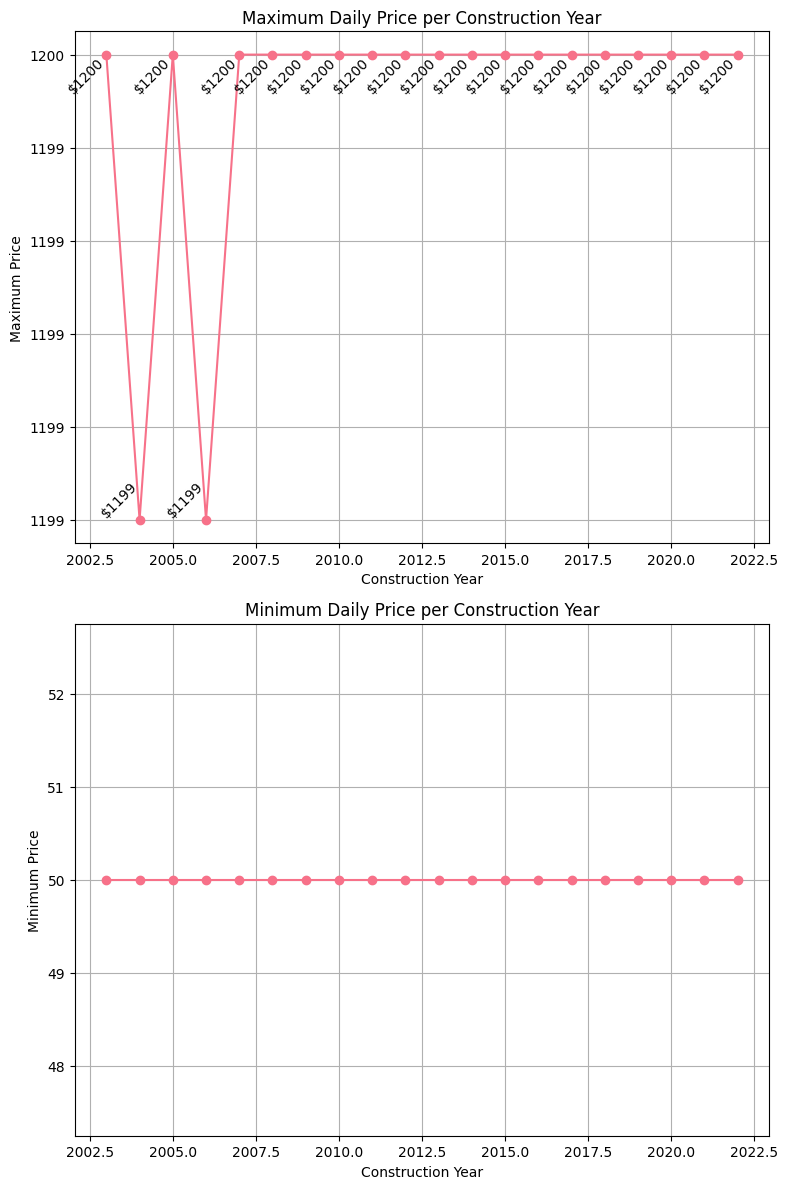

In [416]:
fig, axs = plt.subplots(2, 1, figsize=(8,12))

# Plot for maximum daily price by year
axs[0].plot(max_price_per_year.index, max_price_per_year.values, marker='o')
axs[0].set_xlabel('Construction Year')
axs[0].set_ylabel('Maximum Price')
axs[0].set_title('Maximum Daily Price per Construction Year')
axs[0].grid(True)

# Adding price tags to markers above or below in order to see better
for year, price in max_price_per_year.items():
    if price > 1199:
        axs[0].text(year, price, f'${price:.0f}', rotation=45, ha='right', va='top')
    else:
        axs[0].text(year, price, f'${price:.0f}', rotation=45, ha='right', va='bottom')

# Formatting the y-axes as integers
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Plot for minimum daily price by year
axs[1].plot(min_price_per_year.index, min_price_per_year.values, marker='o')
axs[1].set_xlabel('Construction Year')
axs[1].set_ylabel('Minimum Price')
axs[1].set_title('Minimum Daily Price per Construction Year')
axs[1].grid(True)

plt.tight_layout() 
plt.show()

The difference between room types in the number of apartments with that type of cancellation for each cancellation policy varies and depends on the number of rooms in that type. I create a bar plot showing the number of cancellations for each room type (entire apt, hotel room, private room, shared room) broken down by cancellation policy (flexible, moderate, strict):

In [417]:
counts = airbnb_df.groupby(['cancellation_policy', 'room_type']).size().unstack(fill_value=0)
print(counts)

room_type            Entire home/apt  Hotel room  Private room  Shared room
cancellation_policy                                                        
flexible                       17774          43         15248          738
moderate                       17833          37         15551          739
strict                         17702          34         15397          733


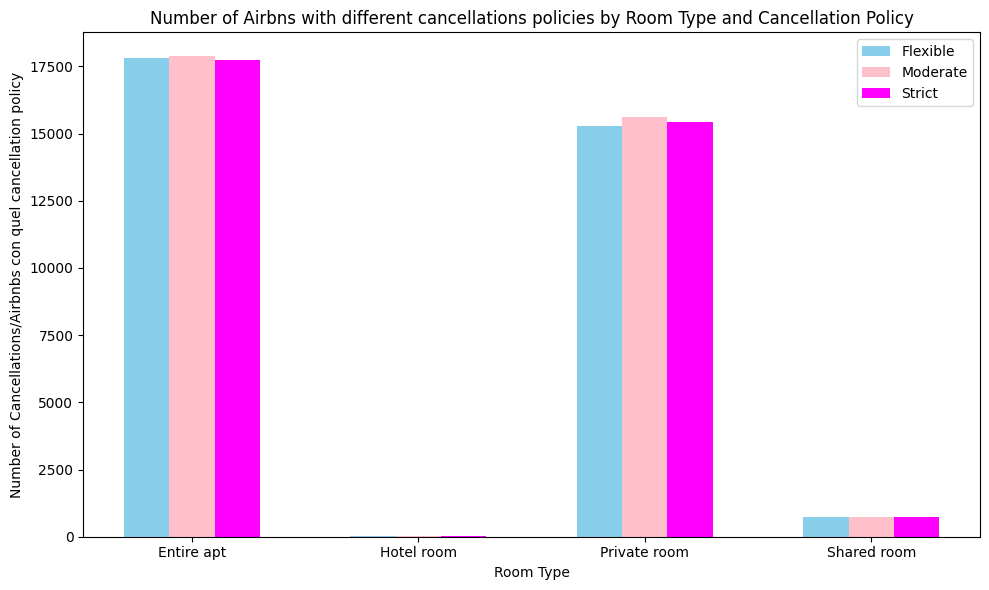

In [418]:
room_types = ['Entire apt', 'Hotel room', 'Private room', 'Shared room']
flexible_counts = [17831, 43, 15293, 739]
moderate_counts = [17874, 37, 15599, 742]
strict_counts = [17749, 34, 15438, 734]

plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(room_types))# where len(room_types) I know is 4 (4 types of rooms) and so idex will be 0,1,2,3 on the x-axis where to place the bars with the types of airbnbs

plt.bar(index, flexible_counts, bar_width, label='Flexible', color='skyblue')
plt.bar([i + bar_width for i in index], moderate_counts, bar_width, label='Moderate', color='pink') 
plt.bar([i + 2 * bar_width for i in index], strict_counts, bar_width, label='Strict', color='fuchsia')

plt.xlabel('Room Type')
plt.ylabel('Number of Cancellations/Airbnbs con quel cancellation policy') 
plt.title('Number of Airbns with different cancellations policies by Room Type and Cancellation Policy')
plt.xticks([i + bar_width for i in index], room_types)
plt.legend()
plt.tight_layout()
plt.show()

there is a small difference between the cancellation policies guaranteed by hosts, the one most commonly used is the moderate one.<br>Now I want to make a plot to see the proportion of the various types of apartments in New York City

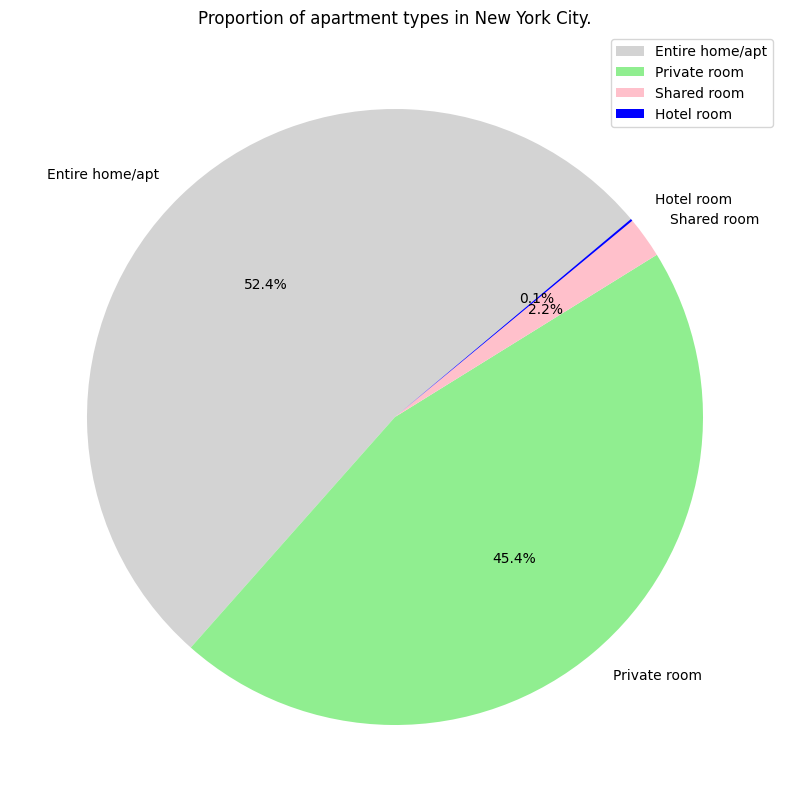

In [419]:
# Calculate the total for each type of apartment
total_counts = airbnb_df['room_type'].value_counts()

colors = ['lightgrey', 'lightgreen', 'pink','blue']

plt.figure(figsize=(12,10))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=40, colors=colors)
plt.title('Proportion of apartment types in New York City.')
plt.legend()
plt.show()


I can see that most of the airbnbs available in the New York City area are entire homes/apartments, this indicates that they are the most sought after option for example by tourists.<br>And now I do the plot to see for each neighborhood group what are the types of Airbnbs in the listing:

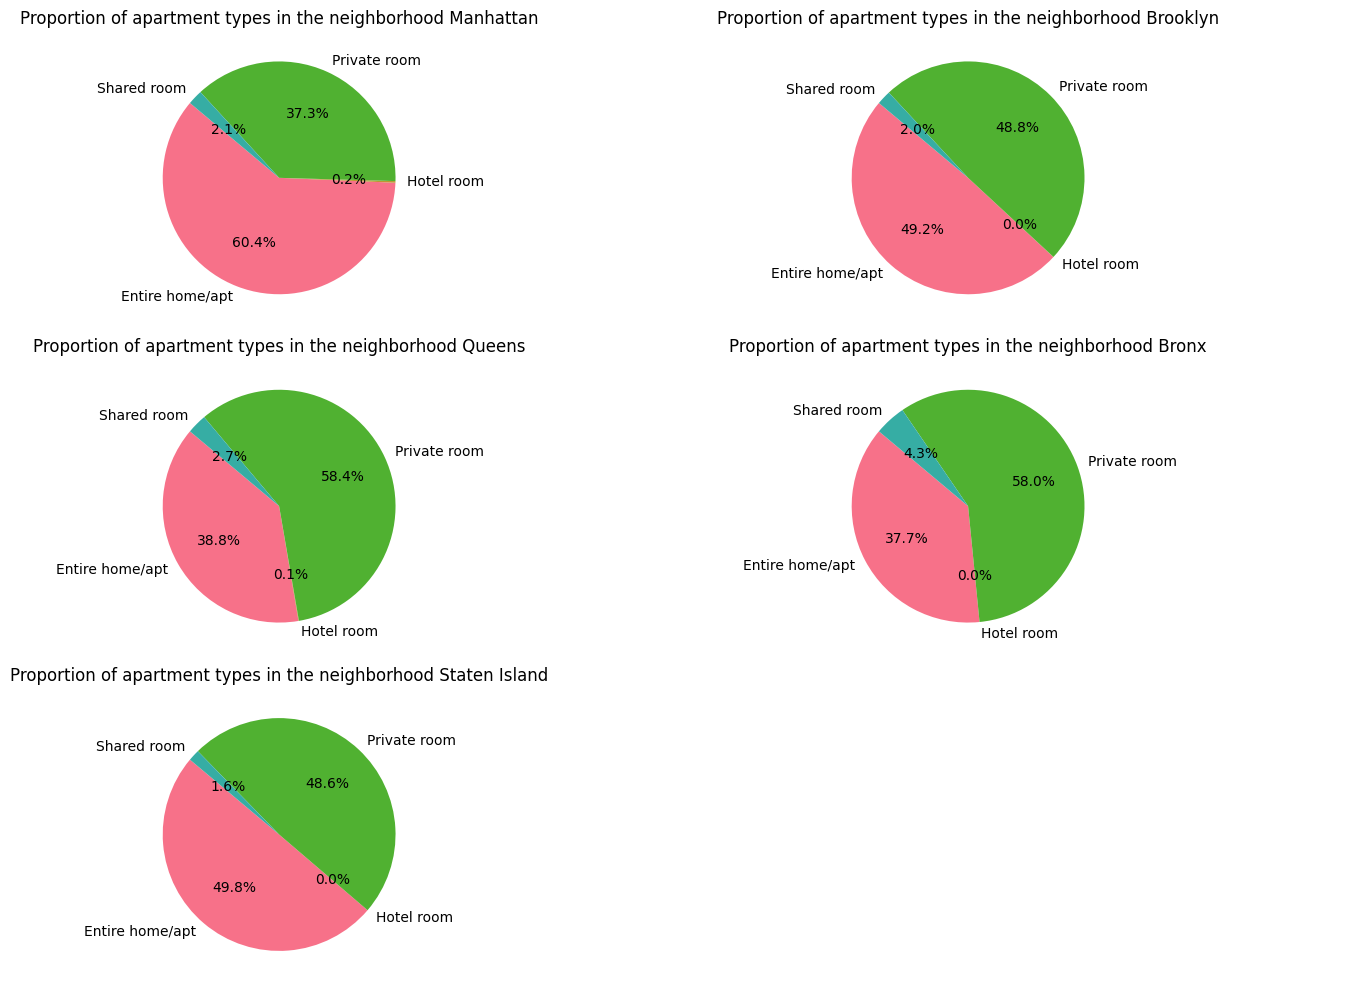

In [420]:
num_rows = 3
num_columns = 2

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
neighborhood_group_counts = airbnb_df.groupby(['neighbourhood_group', 'room_type']).size().unstack(fill_value=0) # group by columns, with size I calculate the size of each resulting group, i.e. number of rows and unstack distributes the different values in a table so rows are different neigh_group and columns room type and 0 fills any empty cells


# 1st plot
axes[0, 0].pie(neighborhood_group_counts.loc['Manhattan'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title(f'Proportion of apartment types in the neighborhood Manhattan')

# 2nd plot
axes[0, 1].pie(neighborhood_group_counts.loc['Brooklyn'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title(f'Proportion of apartment types in the neighborhood Brooklyn')

# 3rd plot
axes[1, 0].pie(neighborhood_group_counts.loc['Queens'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title(f'Proportion of apartment types in the neighborhood Queens')

# 4th plot
axes[1, 1].pie(neighborhood_group_counts.loc['Bronx'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title(f'Proportion of apartment types in the neighborhood Bronx')

# 5th plot
axes[2, 0].pie(neighborhood_group_counts.loc['Staten Island'], labels=neighborhood_group_counts.columns, autopct='%1.1f%%', startangle=140)
axes[2, 0].set_title(f'Proportion of apartment types in the neighborhood Staten Island')

# Eliminate the last excess axes
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


I want to plot the percentage of the cancellation policies:

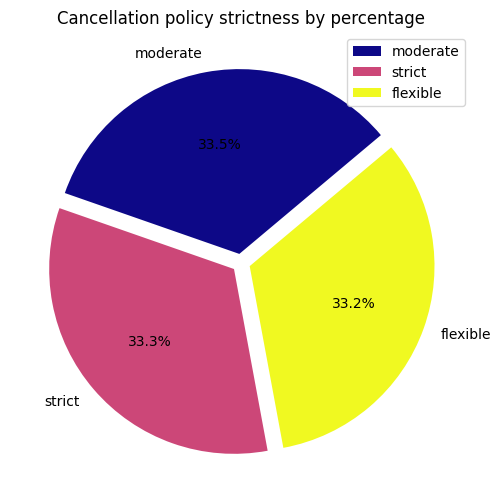

In [421]:
policies = airbnb_df['cancellation_policy'].value_counts()
explode=(0.05,0.05,0.05)

plt.figure(figsize=(8,6))
plt.pie(policies, labels=policies.index, explode = explode, autopct='%1.1f%%', startangle=40, colors = plt.cm.plasma(np.linspace(0, 1, len(policies))))
plt.title('Cancellation policy strictness by percentage')
plt.legend()
plt.show()

there is no substantial difference between the number of policies of the different types of strictness, however, I notice that the one preferred by hosts is the moderate.

Now I plot the distribution in neighborhood groups on the 10 New York City neighborhoods with the most Aribnbs:

In [422]:
# Calculate the 10 neighbourhoods with the most airbnbs
neighbourhood_by_most_Airbnbs = airbnb_df['neighbourhood'].value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10).index

# I use isin to include only the rows corresponding to the top 10 neighbourhoods
airbnb_df_top_10_neighbourhood = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighbourhood)]

In [423]:
neighbourhood_by_most_Airbnbs

neighbourhood
Bedford-Stuyvesant        7892
Williamsburg              7718
Harlem                    5418
Bushwick                  4944
Hell's Kitchen            3947
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

<Figure size 600x400 with 0 Axes>

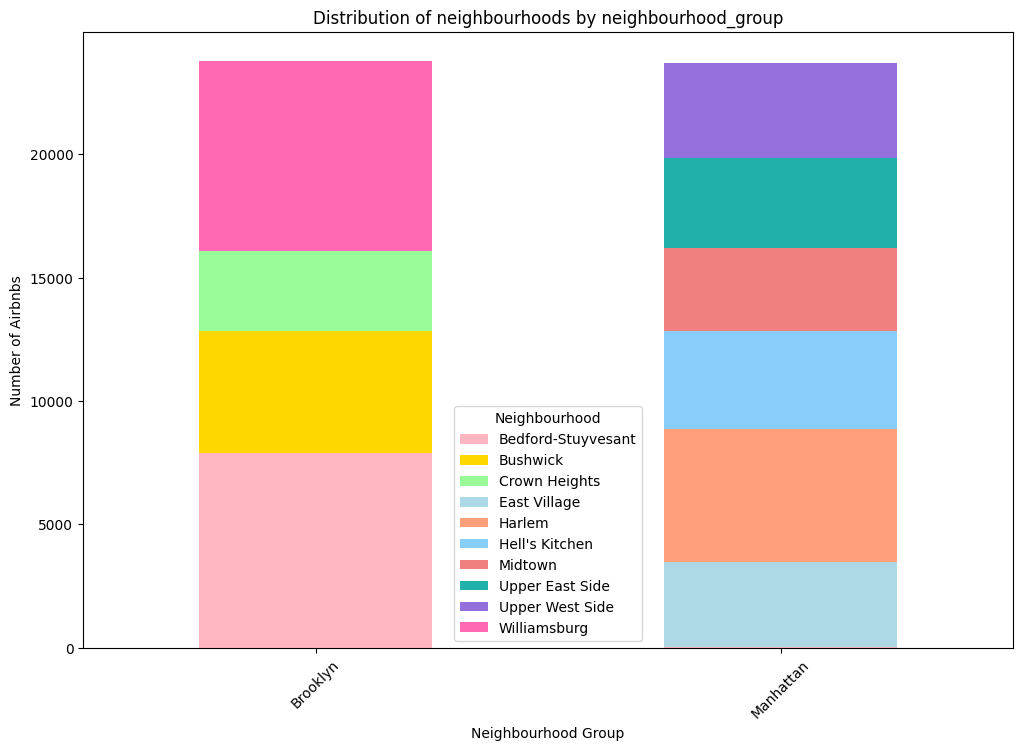

In [424]:
plt.figure(figsize=(6,4))
contingency_table = pd.crosstab(airbnb_df_top_10_neighbourhood['neighbourhood_group'], airbnb_df_top_10_neighbourhood['neighbourhood']) # different than the previous one because now I want on the x-axis neighbourhood group

pastel_colors = ['#FFB6C1', '#FFD700', '#98FB98', '#ADD8E6', '#FFA07A', '#87CEFA', '#F08080', '#20B2AA', '#9370DB', '#FF69B4']

contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=pastel_colors)
plt.title('Distribution of neighbourhoods by neighbourhood_group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Airbnbs')
plt.xticks(rotation=45)  # I rotate the labels on the x-axis for better readability
plt.legend(title='Neighbourhood')
plt.show()

I see that Brooklyn has fewer neighborhoods but each of them has a high number of Airbnbs, while Manhattan has more neighborhoods but fewer Airbnbs.<br>Now I wanto to find the neighbourhood that host the best rate reviews on average:

In [425]:
average_review_rate = airbnb_df.groupby('neighbourhood')['review_rate_number'].mean()
average_review_rate

neighbourhood
Allerton           3.273741
Arden Heights      3.777778
Arrochar           3.476061
Arverne            3.228700
Astoria            3.228339
                     ...   
Windsor Terrace    3.102083
Woodhaven          3.321053
Woodlawn           3.310345
Woodrow            4.000000
Woodside           3.405810
Name: review_rate_number, Length: 224, dtype: float64

In [426]:
best_neighbourhood = average_review_rate.idxmax() # will return the index label (neighborhood name) that has the highest average review rates
best_review_rate = average_review_rate.max()
print("The neighborhood with the best review rate on average is:", best_neighbourhood)
print("Its average review rate is:", best_review_rate)

The neighborhood with the best review rate on average is: Glen Oaks
Its average review rate is: 4.5


I show the 15 neighborhoods with the highest rate in reviews, on average, and I use a horizontal bar graph and also see from the graph which neighborhood is the best and what its rate corresponds to:

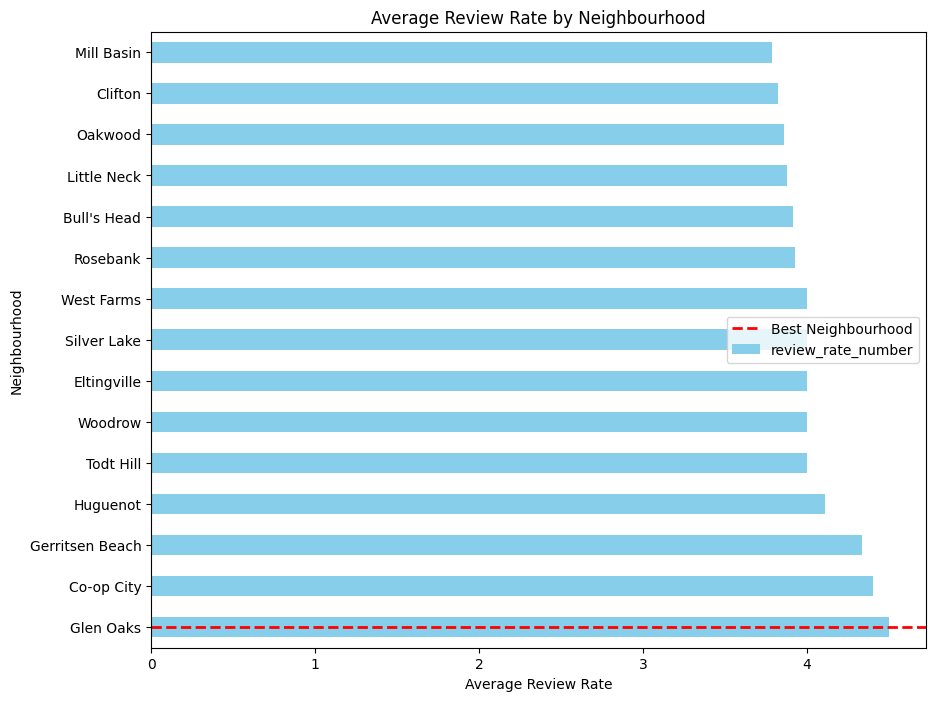

In [427]:
average_review_rate_sorted = average_review_rate.sort_values(ascending=False)
some_neighbourhood_average_review_rate = average_review_rate_sorted.head(15)
plt.figure(figsize=(10, 8))
some_neighbourhood_average_review_rate.plot(kind='barh', color='skyblue')
plt.xlabel('Average Review Rate')
plt.ylabel('Neighbourhood')
plt.title('Average Review Rate by Neighbourhood')
plt.axhline(y=best_neighbourhood, color='red', linestyle='--', linewidth=2, label='Best Neighbourhood')
plt.legend()
plt.show()

Now I want to plot the distribution of review rates based on host identity confirmation:

In [428]:
reviews_counts = airbnb_df.groupby(['host_identity_verified', 'review_rate_number']).size().unstack(fill_value=0)
reviews_counts

review_rate_number,1.000000,2.000000,3.000000,3.279106,4.000000,5.000000
host_identity_verified,,,,,,
unconfirmed,4649,11475,11609,171,11572,11494
verified,4482,11454,11504,141,11575,11703


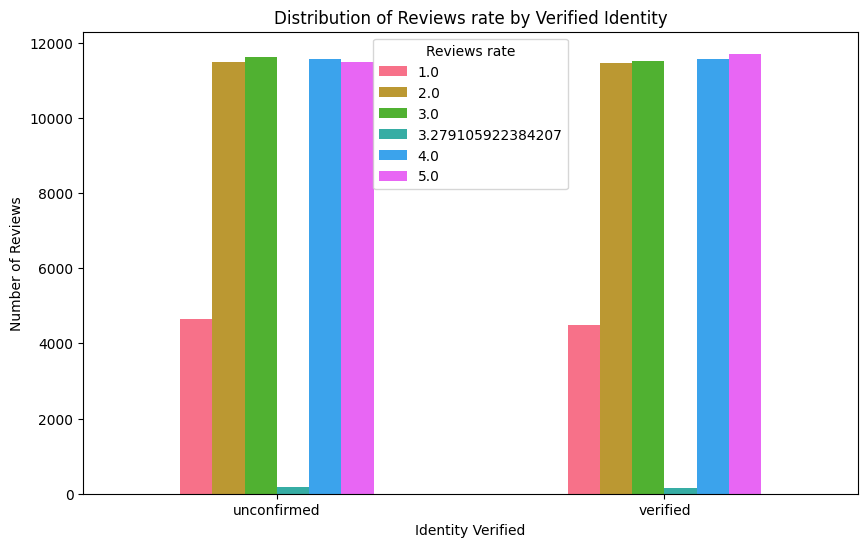

In [429]:
reviews_counts.plot(kind='bar',  figsize=(10, 6)) # I put stacked to stack the data in the bar graph
plt.xlabel('Identity Verified')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews rate by Verified Identity')
plt.legend(title='Reviews rate')
plt.xticks(rotation=0)  # To avoid the rotation of labels on the x-axis
plt.show()

I observe that the number of reviews with each score is similar between verified and unverified hosts, it might indicate that the identity verification status is not a determining factor in guests' overall evaluation, while other factors, such as may be cleanliness, comfort, location, and hospitality, are more influential, or there is a lack of awareness of host idnentity confirmation by guests.

<Figure size 1000x600 with 0 Axes>

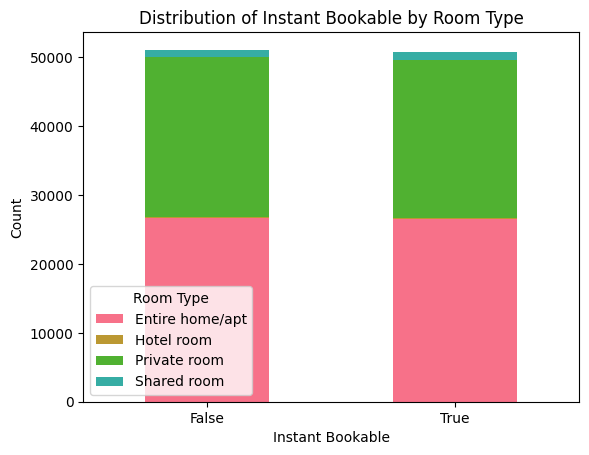

In [430]:
# Calculates the frequency of each combination of instant_bookable and room_type
counts = airbnb_df.groupby(['instant_bookable', 'room_type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Instant Bookable by Room Type')
plt.xlabel('Instant Bookable')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Room Type')
plt.show()


The fact whether Airbnb is bookable instantly or later does not depend on the type of room because I don't notice substantial differences in this graph.<br>Now I want to study the relationship between `price` and `room type`, and to do this I use the boxplot<br> https://seaborn.pydata.org/generated/seaborn.boxplot.html

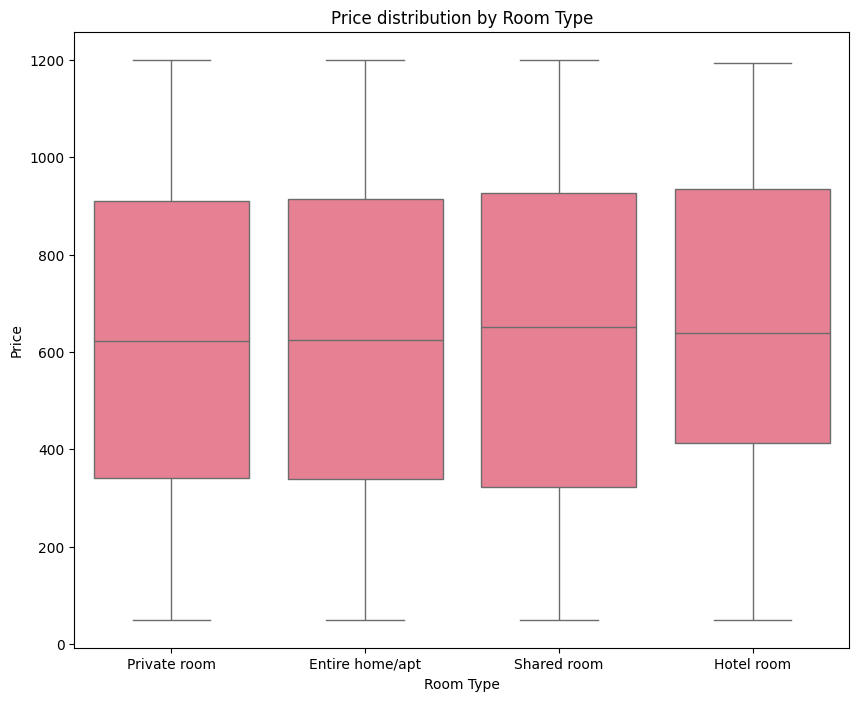

In [484]:
plt.figure(figsize=(10,8))
sns.boxplot(x='room_type', y='price', data=airbnb_df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price distribution by Room Type')
plt.show()

I observe that the median is similar for the different room types so the average prices of the different room_types are similar. I observe that the lower end of the boxplot related to hotel room is higher than those of the other room types, this could mean that for hotel room there are data with higher prices, but not too much to be considered outliers. <br>One thus has a greater variety of prices within that room type but without a significant difference in the median.

Now I calculate the highest price for neighborhood and then the lowest price with their cordinates and then create a map of New York City to visualize where they are located.<br>I use the .agg() method found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html <br>to aggregate according to long and lat

In [432]:
# I find the latitude and longitude of each neighborhood
neighborhood_coordinates = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'})

# I find the maximum price for each neighborhood
max_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].max()

# I find the highest price overall among all neighborhoods
max_price = max_price_per_neighborhood.max()

# I find the neighborhoods where you have the highest price
most_expensive_neighborhoods = max_price_per_neighborhood[max_price_per_neighborhood == max_price].index.tolist()

# Print neighborhoods with maximum price, relative maximum price, latitude and longitude
print("The neighborhoods with the highest price are.:")
for neighborhood in most_expensive_neighborhoods:
    lat = neighborhood_coordinates.loc[neighborhood, 'lat']
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    print(f"Neighbourhood: {neighborhood}, \t\t\tLatitude: {lat}, Longitude: {long}")

# Print the total number of neighborhoods in the DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("\n\nTotal number of neighborhoods in the DataFrame:", total_neighborhoods)
print(f'Maximum price: {max_price}')

# print the number of neighbourhoods with the maximum price
num_most_expensive_neighborhoods = len(most_expensive_neighborhoods)
print("Number of neighborhoods with the maximum price:", num_most_expensive_neighborhoods)


The neighborhoods with the highest price are.:
Neighbourhood: Astoria, 			Latitude: 40.764378282383255, Longitude: -73.92026934334407
Neighbourhood: Bedford-Stuyvesant, 			Latitude: 40.687242897738216, Longitude: -73.93956476071084
Neighbourhood: Belmont, 			Latitude: 40.854824471363635, Longitude: -73.887575805
Neighbourhood: Boerum Hill, 			Latitude: 40.68639942415731, Longitude: -73.9853891011236
Neighbourhood: Bushwick, 			Latitude: 40.69642247864078, Longitude: -73.92018328680219
Neighbourhood: Chelsea, 			Latitude: 40.74491418754192, Longitude: -73.99784455004414
Neighbourhood: City Island, 			Latitude: 40.84807195121952, Longitude: -73.78705268292683
Neighbourhood: Crown Heights, 			Latitude: 40.6727675907974, Longitude: -73.94547928703827
Neighbourhood: Ditmars Steinway, 			Latitude: 40.77492504288856, Longitude: -73.91083407159825
Neighbourhood: East Flatbush, 			Latitude: 40.648745340474605, Longitude: -73.93908366663614
Neighbourhood: East New York, 			Latitude: 40.668207782

In [433]:
# I find the latitude and longitude of each neighborhood
neighborhood_coordinates1 = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'}) #aggrego i dati raggruppandoli in quartire e calcolando al media della latitudine e longitudine di ciascun quartire per ottenere un'unica coppia di coordinate per ciascun quartiere

# I find the minimum price for each neighborhood
min_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].min()

# I find the lowest price in general among all neighborhoods
min_price = min_price_per_neighborhood.min()

# I find the neighborhoods where you have the lowest price
less_expensive_neighborhoods = min_price_per_neighborhood[min_price_per_neighborhood == min_price].index.tolist()

# Print neighborhoods with minimum price, relative minimum price, latitude and longitude
print("The neighborhoods with the lowest price are.:")
for neighborhood in less_expensive_neighborhoods:
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat']
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    print(f"Neighbourhood: {neighborhood}, \t\t\tLatitude: {lat}, Longitude: {long}")

# Print the total number of neighborhoods in the DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("\n\nTotal number of neighborhoods in the DataFrame:", total_neighborhoods)
print("Minimum price:", min_price)

# Print the number of neighborhoods with the minimum price
num_less_expensive_neighborhoods = len(less_expensive_neighborhoods)
print("Number of neighborhoods with the lowest price:", num_less_expensive_neighborhoods)

The neighborhoods with the lowest price are.:
Neighbourhood: Astoria, 			Latitude: 40.764378282383255, Longitude: -73.92026934334407
Neighbourhood: Bedford-Stuyvesant, 			Latitude: 40.687242897738216, Longitude: -73.93956476071084
Neighbourhood: Borough Park, 			Latitude: 40.63735557518797, Longitude: -73.99719103759398
Neighbourhood: Bushwick, 			Latitude: 40.69642247864078, Longitude: -73.92018328680219
Neighbourhood: Canarsie, 			Latitude: 40.63885512718204, Longitude: -73.90158159102245
Neighbourhood: Crown Heights, 			Latitude: 40.6727675907974, Longitude: -73.94547928703827
Neighbourhood: Cypress Hills, 			Latitude: 40.68225271934132, Longitude: -73.88367905859282
Neighbourhood: Ditmars Steinway, 			Latitude: 40.77492504288856, Longitude: -73.91083407159825
Neighbourhood: East Elmhurst, 			Latitude: 40.76292220850311, Longitude: -73.87791899453222
Neighbourhood: East Harlem, 			Latitude: 40.7963289905, Longitude: -73.94225898535345
Neighbourhood: East Village, 			Latitude: 40.726

Now I create the map where green markers indicate the least expensive airbnbs and red markers indicate the most expensive airbnbs and their price per day.
<br>Resources used: <br>
- I use the folium library:https://www.andreaprovino.it/folium-geospatial-data-python <br> 
- https://youtu.be/SgacOaHoJLs?si=vJ5hJFD5QxGkGEyv how to create the basemap 

In [434]:
#I create the basemap
map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 10)
# map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 8, tiles = "CartoDB Positron")

# Iterate on each neighborhood and create a marker on the map for each expensive neighborhood
for neighborhood in most_expensive_neighborhoods:
    # I find the latitude and longitude of the neighborhood
    lat = neighborhood_coordinates.loc[neighborhood, 'lat'] # neighborhood_coordinates l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    
    # I add a marker with the price of the neighborhood
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $1200', icon = folium.Icon(color = 'red', icon = 'house', prefix = 'fa')).add_to(map_nyc)

# Iterate on each neighborhood and create a marker on the map for each least expensive neighborhood
for neighborhood in less_expensive_neighborhoods:
    # I find the latitude and longitude of the neighborhood
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat'] # neighborhood_coordinates1 l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    
    # I add a marker with the price of the neighborhood
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $50', icon = folium.Icon(color = 'green', icon = 'house', prefix = 'fa')).add_to(map_nyc)
map_nyc
# on Streamlit you can see it

# Modeling with ML algorithms

# Linear Regression

I want to predict the daily price for the Airbnbs in New York City and I want use the linear regression.

Import libraries

In [435]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [436]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101829 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101829 non-null  int64  
 1   name                            101829 non-null  object 
 2   host_id                         101829 non-null  int64  
 3   host_identity_verified          101829 non-null  object 
 4   host_name                       101829 non-null  object 
 5   neighbourhood_group             101829 non-null  object 
 6   neighbourhood                   101829 non-null  object 
 7   lat                             101829 non-null  float64
 8   long                            101829 non-null  float64
 9   country                         101829 non-null  object 
 10  country_code                    101829 non-null  object 
 11  instant_bookable                101829 non-null  bool   
 12  cancellation_policy  

Before making the model I transform the categorical variables that may be interesting to me into numerical variables

In [437]:
# I transform the boolen intant_bookable variable to binary.
# Using the map() method.
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].map({True: 1, False: 0})
airbnb_df.instant_bookable.value_counts()

instant_bookable
0    51096
1    50733
Name: count, dtype: int64

I can use the library LabelEncoder to turn categorical variables into numeric variables

In [438]:
from sklearn.preprocessing import LabelEncoder

In [439]:
# Map the values of the variable 'cancellation_policy' to the 0,1,2
print(f'The values \n{airbnb_df.cancellation_policy.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'cancellation_policy'
airbnb_df['cancellation_policy'] = label_encoder.fit_transform(airbnb_df['cancellation_policy'])
airbnb_df.cancellation_policy.value_counts()

The values 
cancellation_policy
moderate    34160
strict      33866
flexible    33803
Name: count, dtype: int64:
 


cancellation_policy
1    34160
2    33866
0    33803
Name: count, dtype: int64

In [440]:
# Map the values of the variable 'neighbourhood_group' to the 0,1,2,3,4,5
print(f'The values \n{airbnb_df.neighbourhood_group.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'neighbourhood_group'
airbnb_df['neighbourhood_group'] = label_encoder.fit_transform(airbnb_df['neighbourhood_group'])
airbnb_df.neighbourhood_group.value_counts()

The values 
neighbourhood_group
Manhattan        43490
Brooklyn         41529
Queens           13174
Bronx             2691
Staten Island      945
Name: count, dtype: int64:
 


neighbourhood_group
2    43490
1    41529
3    13174
0     2691
4      945
Name: count, dtype: int64

In [441]:
# Map the values of the variable 'host_identity_verified' to the 0,1
print(f'The values \n{airbnb_df.host_identity_verified.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'cancellation_policy' 'host_identity_verified'
airbnb_df['host_identity_verified'] = label_encoder.fit_transform(airbnb_df['host_identity_verified'])
airbnb_df.host_identity_verified.value_counts()

The values 
host_identity_verified
unconfirmed    50970
verified       50859
Name: count, dtype: int64:
 


host_identity_verified
0    50970
1    50859
Name: count, dtype: int64

In [442]:
airbnb_df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,0,Madaline,1,Kensington,40.64749,-73.97237,United States,US,0,2,Private room,2020,966.0,193.0,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,1,Jenna,2,Midtown,40.75362,-73.98377,United States,US,0,1,Entire home/apt,2007,142.0,28.0,30.0,45.0,4.0,2.0,228.0
3,1002755,Home away from home,85098326012,0,Garry,1,Clinton Hill,40.68514,-73.95976,United States,US,1,1,Entire home/apt,2005,368.0,74.0,30.0,270.0,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,1,Lyndon,2,East Harlem,40.79851,-73.94399,United States,US,0,1,Entire home/apt,2009,204.0,41.0,10.0,9.0,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,1,Michelle,2,Murray Hill,40.74767,-73.97500,United States,US,1,0,Entire home/apt,2013,577.0,115.0,3.0,74.0,3.0,1.0,374.0


I no longer have to consider the categorical variables but only the numeric variables that I transformed, but I don't drop the columns because I may need them later, I prefer to create a copy of the dataframe and use it to do the linear regression and drop on it some columns that I don't need for the model

In [443]:
airbnb2_df = airbnb_df.copy()

In [444]:
# Map the values of the variable 'room_type' to the 0,1,2,3
print(f'The values \n{airbnb_df.room_type.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

#Encodes the variable 'room_type'
airbnb2_df['room_type'] = label_encoder.fit_transform(airbnb_df['room_type'])
airbnb2_df.room_type.value_counts()
     

The values 
room_type
Entire home/apt    53309
Private room       46196
Shared room         2210
Hotel room           114
Name: count, dtype: int64:
 


room_type
0    53309
2    46196
3     2210
1      114
Name: count, dtype: int64

In [445]:
airbnb2_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [446]:
airbnb2_df.drop(columns=['id', 'name', 'neighbourhood','host_name','host_id', 'lat', 'long', 'country', 'country_code'], inplace=True)

In [447]:
#check
airbnb2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101829 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101829 non-null  int32  
 1   neighbourhood_group             101829 non-null  int32  
 2   instant_bookable                101829 non-null  int64  
 3   cancellation_policy             101829 non-null  int32  
 4   room_type                       101829 non-null  int32  
 5   construction_year               101829 non-null  int32  
 6   price                           101829 non-null  float64
 7   service_fee                     101829 non-null  float64
 8   minimum_nights                  101829 non-null  float64
 9   number_of_reviews               101829 non-null  float64
 10  review_rate_number              101829 non-null  float64
 11  calculated_host_listings_count  101829 non-null  float64
 12  availability_365     

Split dataset to X and Y variables.To begin, I define the target variable

In [448]:
# I want to predict the daily price of the Airbnb in New York City
Y = airbnb2_df.price.values
Y

array([ 966.,  142.,  368., ...,  988.,  546., 1032.])

In [449]:
X = airbnb2_df.drop(['price'], axis = 1) # to make the prediction I delete the column I need to predict
X

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,0,1,0,2,2,2020,193.0,10.0,9.0,4.0,6.0,286.0
1,1,2,0,1,0,2007,28.0,30.0,45.0,4.0,2.0,228.0
3,0,1,1,1,0,2005,74.0,30.0,270.0,4.0,1.0,322.0
4,1,2,0,1,0,2009,41.0,10.0,9.0,3.0,1.0,289.0
5,1,2,1,0,0,2013,115.0,3.0,74.0,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102594,1,1,0,0,2,2003,169.0,1.0,0.0,3.0,1.0,227.0
102595,0,2,1,1,2,2016,167.0,1.0,1.0,2.0,2.0,395.0
102596,0,1,1,1,2,2009,198.0,3.0,0.0,5.0,1.0,342.0
102597,0,3,1,2,0,2015,109.0,2.0,5.0,3.0,1.0,386.0


Data split

In [450]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) #80% of X and Y are test and 20% are train

In [451]:
# 80% of X and Y
X_train.shape , Y_train.shape

((81463, 12), (81463,))

In [452]:
# 20% of X and Y
X_test.shape , Y_test.shape

((20366, 12), (20366,))

In [453]:
# I standardize the variables
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

Linear Regression Model

In [454]:
# define the Regression model
model = LinearRegression()

In [455]:
# build the training model
model.fit(X_train, Y_train)

LinearRegression()

In [456]:
# apply the trained model to make prediction on test set
Y_pred = model.predict(X_test)

Prediction results: Model performances

In [457]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
print('Coefficient of determiantion (R^2) :%.5f' % r2_score(Y_test, Y_pred))

Coefficients: [ 5.51215424e-03  2.19373960e-03 -5.88726341e-03  1.37962236e-02
  9.43283839e-03 -8.28974974e-03  5.69969752e+02 -8.17489577e-04
  5.43957568e-03 -1.06151819e-03  3.21181806e-05 -1.14136076e-02]
Intercept: 624.9887648310519
Mean squared error (MSE): 10.26
Coefficient of determiantion (R^2) :0.99991


I assess whether the **MSE** is adequate and low relative to the range of target varibaile 'price' values

In [458]:
mse = mean_squared_error(Y_test, Y_pred)

# Calculates the variance of the price variable
target_variance = np.var(Y_test)

mse_to_variance_ratio = mse / target_variance

print("MSE to Variance Ratio:", mse_to_variance_ratio)

MSE to Variance Ratio: 9.325610641019323e-05


the mean square error is very small compared to the natural variation in the data of the target variable. Such a low value for this ratio is a positive sign and suggests that the model is making good predictions with respect to the natural variability in the data in the 'price' column.

In [459]:
df = pd.DataFrame({"Y_test": Y_test, "Y_pred": Y_pred})
df.head(10)

,Y_test,Y_pred
0,950.0,947.137404
1,1009.0,1006.607154
2,1036.0,1031.406911
3,665.0,664.641285
4,379.0,382.117089
5,552.0,550.617600
6,722.0,719.138475
7,788.0,788.551989
8,514.0,515.960315
9,875.0,872.793014


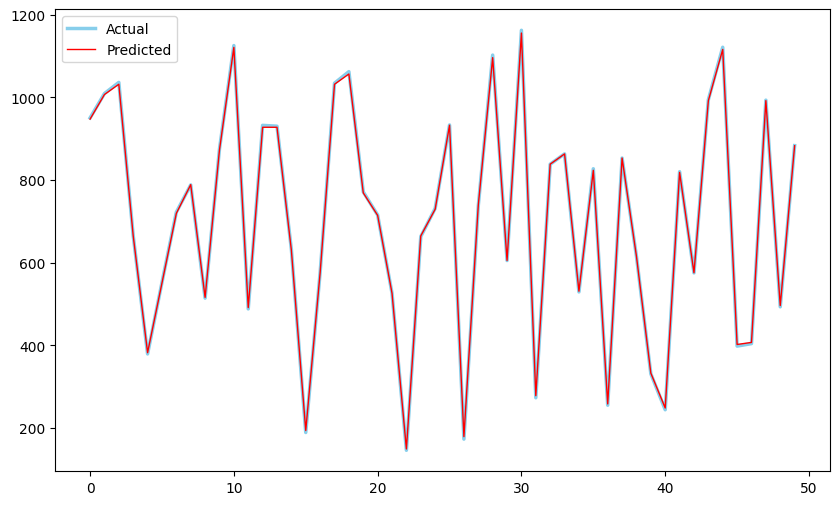

In [460]:
plt.figure(figsize = (10,6))
plt.plot(df['Y_test'][:50], color = 'skyblue', linewidth = 2.5)
plt.plot(df['Y_pred'][:50], color = 'red', linewidth = 1)
plt.legend(['Actual', 'Predicted'])
plt.show()

It's possible to see that the predictable values are really really close to the actual ones, so the prediction might looks accurate.

In [461]:
pd.DataFrame(model.coef_ ,airbnb2_df.columns[:-1] , columns=['Coefficient'])

,Coefficient
host_identity_verified,0.005512
neighbourhood_group,0.002194
instant_bookable,-0.005887
cancellation_policy,0.013796
room_type,0.009433
construction_year,-0.008290
price,569.969752
service_fee,-0.000817
minimum_nights,0.005440
number_of_reviews,-0.001062


In [462]:
intercept = model.intercept_
coefficients = model.coef_
print("Regression line equation:")
print("Y = {:.2f} + {:.3f} * X".format(intercept, coefficients[0]))

Regression line equation:
Y = 624.99 + 0.006 * X


Scatter plot

In [463]:
Y_test

array([ 950., 1009., 1036., ...,  453.,  187.,  370.])

In [464]:
Y_pred

array([ 947.13740358, 1006.60715394, 1031.4069109 , ...,  456.46361643,
        188.82795625,  372.21904746])

<Axes: >

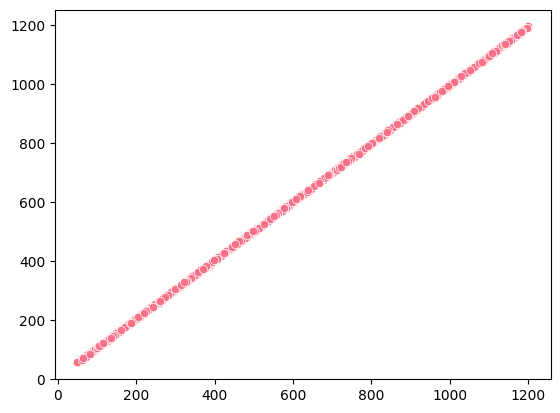

In [465]:
sns.scatterplot(x=Y_test, y=Y_pred)

since the `price` variable is correlated only with the `service_fee` variable the linear regression model produces this result in which the plots in the scatterplot follow an ascending diagonal reatta line.

<Axes: ylabel='Count'>

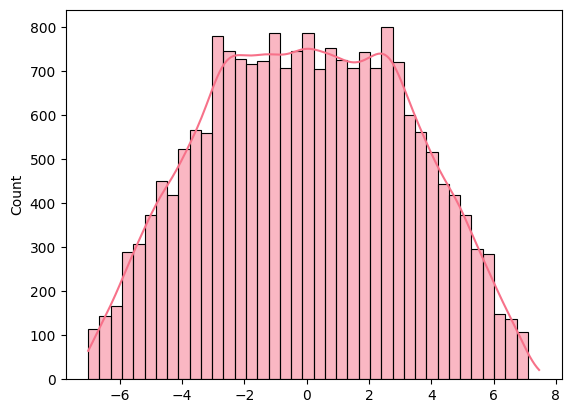

In [466]:
# Plot of the distribution of residuals
residuals = Y_test - Y_pred
sns.histplot(residuals, kde=True)

# Classification

I want to make predictions about the varibaile room_type, i.e., the type of airbnb offered by hosts, in order to help them adjust their marketing strategies or make changes to their Airbnb based on the prevailing demands in the market and to analyze the competition. Airbnb could also tailor recommendations to users using predictions about the room types offered for example by suggesting ads to platform users that match the preferred room type based on their past experiences.

In [485]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In this model the target variable `room type` must be categorical so I create another copy of the initial *airbnb_df* dataframe and then delete the categorical columns that I am not interested in

In [468]:
airbnb3_df = airbnb_df.copy()
airbnb3_df.drop(columns=['id', 'name', 'neighbourhood','host_name','host_id', 'lat', 'long', 'country', 'country_code'], inplace=True)

In [469]:
airbnb3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101829 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101829 non-null  int32  
 1   neighbourhood_group             101829 non-null  int32  
 2   instant_bookable                101829 non-null  int64  
 3   cancellation_policy             101829 non-null  int32  
 4   room_type                       101829 non-null  object 
 5   construction_year               101829 non-null  int32  
 6   price                           101829 non-null  float64
 7   service_fee                     101829 non-null  float64
 8   minimum_nights                  101829 non-null  float64
 9   number_of_reviews               101829 non-null  float64
 10  review_rate_number              101829 non-null  float64
 11  calculated_host_listings_count  101829 non-null  float64
 12  availability_365     

In [470]:
# Split dataset to X and Y variables
X1 = airbnb3_df.drop(columns=['room_type'], axis=1)  # Exclude the target variable "room_type"
Y1 = airbnb3_df['room_type']

In [471]:
# Divide the data into training and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=101)

In [472]:
# Define the RandomForestClassifier model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [473]:
#  build the training model
model1.fit(X1_train, Y1_train)

RandomForestClassifier(random_state=42)

In [474]:
# apply the trained model to make prediction on test set
Y1_pred = model1.predict(X1_test)

In [489]:
# Evaluates the performance of the model
accuracy = accuracy_score(Y1_test, Y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7639202592556221


In [492]:
print('Test Accuracy : {:.2f}'.format(accuracy_score(Y1_test, Y1_pred)))
print('\nConfusion Matrix : ')
print(confusion_matrix(Y1_test, Y1_pred))
print('\nClassification Report :')
print(classification_report(Y1_test, Y1_pred, zero_division=1))


Test Accuracy : 0.76

Confusion Matrix : 
[[8658    0 2001    1]
 [   2    0   27    0]
 [2448    0 6775    2]
 [  88    0  239  125]]

Classification Report :
                 precision    recall  f1-score   support

Entire home/apt       0.77      0.81      0.79     10660
     Hotel room       1.00      0.00      0.00        29
   Private room       0.75      0.73      0.74      9225
    Shared room       0.98      0.28      0.43       452

       accuracy                           0.76     20366
      macro avg       0.87      0.46      0.49     20366
   weighted avg       0.77      0.76      0.76     20366



In [476]:
df1 = pd.DataFrame({"Y_test": Y1_test, "Y_pred": Y1_pred})
df1.head(20)

,Y_test,Y_pred
37971,Entire home/apt,Entire home/apt
85443,Private room,Entire home/apt
87970,Private room,Private room
21952,Entire home/apt,Entire home/apt
54769,Private room,Entire home/apt
9724,Entire home/apt,Entire home/apt
45817,Entire home/apt,Entire home/apt
25598,Private room,Entire home/apt
27808,Private room,Private room
15028,Private room,Entire home/apt


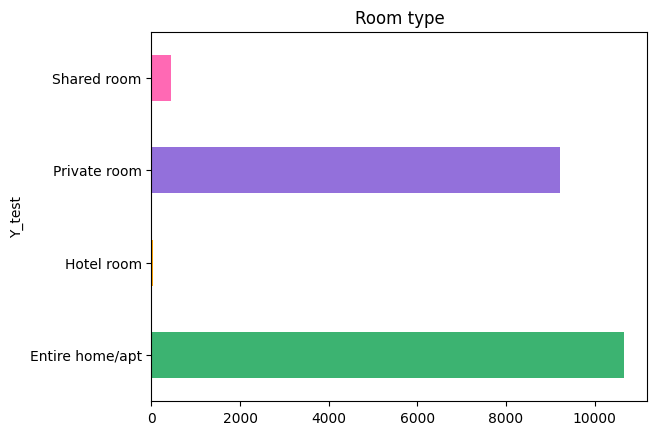

In [477]:
custom_palette = ['mediumseagreen', 'orange', 'mediumpurple', 'hotpink']
df1.groupby('Y_test').size().plot(kind='barh', color=custom_palette)
plt.title('Room type')
plt.show()

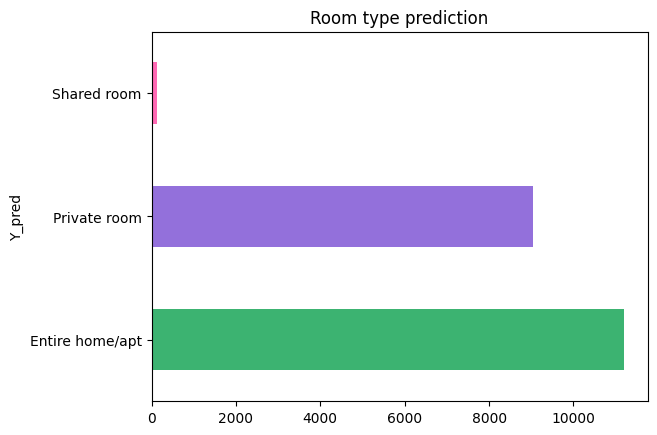

In [478]:
custom_palette = ['mediumseagreen', 'mediumpurple', 'hotpink']
df1.groupby('Y_pred').size().plot(kind='barh', color=custom_palette)
plt.title('Room type prediction')
plt.show()

These horizontal bar graphs contrast the number of Airbnb for each room type that hosts made available to customers and the room types they actually should have made available according to the model used.<br>It's possible to see that the hotel rooms in the forecast are not expected, the number of shared room has decreased significantly while the number of entire home has increased.

And I want to see also the accuracy of this model in a bar plot

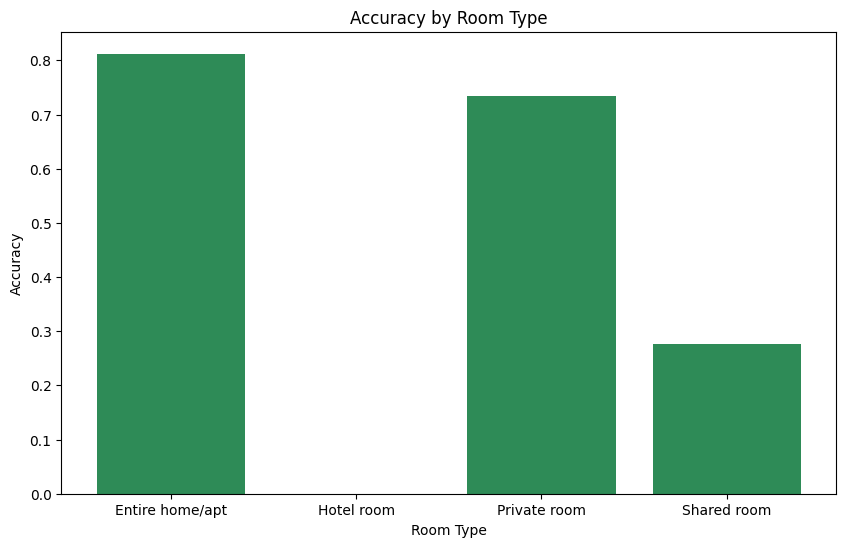

In [479]:
# Calculates classification accuracy for each class.
class_accuracy = {}
for i, class_name in enumerate(model1.classes_):
    correct_predictions = np.sum((Y1_test == class_name) & (Y1_pred == class_name))
    total_predictions = np.sum(Y1_test == class_name)
    class_accuracy[class_name] = correct_predictions / total_predictions

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_accuracy.keys(), class_accuracy.values(), color='#2E8B57')
plt.xlabel('Room Type')
plt.ylabel('Accuracy')
plt.title('Accuracy by Room Type')
plt.xticks(rotation=0)
plt.show()